# Análisis de datos empresa Cotton Plus 

En la Base de datos llamada "Data DS Cotton Plus_2" se encuentran los datos de la venta realizadas por la empresa en sus diferentes sedes en el país en los años 2019 y 2020. El análisis que se desarrollará a continuación busca ser una herramienta para que la gerencia pueda tomar decisiones estratégicas en el negocio, basado en el conocimiento generado por la base de datos que contiene toda la información que han recopilado en el pasado.

# Herramientas computacionales 

Para realizar el análisis de los datos de la empresa CottonPlus Inc. Se utilizará Python, debido a que este es un lenguaje de programación gratuito y que tiene amplio soporte en el medio, puesto que cuenta con gran cantidad de librerías con funciones y métodos que permiten realizar diferentes análisis estadísticos, depuración de datos, realizar diferentes gráficos e implementar modelos machine learning que permitirá brindarles a las directivas de la empresa el conocimiento necesario para tomar las estrategias de negocio adecuadas.  

## Capítulo 1

In [1]:
# Importación de librerías
import numpy as np
import pandas as pd
from scipy import stats as ss
import seaborn as sns
from sklearn.preprocessing import scale, MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# se carga la base de datos
data=pd.read_excel('Data DS Cotton Plus_2.xlsx', sheet_name='BD')
data

,Cedula,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Tipo de Contacto,...,TelefonoOficina,Telefono Casa,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza
0,1,Nombre Cliente 1,Aficionados,Si,No,264800,2,0,0,11001,...,NaN,NaN,0,0,0,0,0,0,0,0
1,2,Nombre Cliente 2,Esporádicos,Si,No,179900,1,0,0,11001,...,NaN,NaN,179900,0,0,0,0,0,0,0
2,3,Nombre Cliente 3,Aficionados,Si,No,189800,2,0,0,11101,...,NaN,NaN,451200,0,0,0,0,0,0,0
3,4,Nombre Cliente 4,Aficionados,Si,No,65900,1,0,0,11001,...,NaN,NaN,0,0,0,0,0,0,0,1859600
4,5,Nombre Cliente 5,Aficionados,Si,No,238800,2,0,0,11101,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,9972,Nombre Cliente 9972,Aficionados,Si,No,191260,4,0,0,11001,...,NaN,NaN,0,0,0,0,0,0,0,0
9972,9973,Nombre Cliente 9973,Aficionados,Si,No,371600,5,0,0,10100,...,NaN,NaN,0,0,0,0,0,0,0,0
9973,9974,Nombre Cliente 9974,Aficionados,Si,No,254960,3,0,0,11001,...,NaN,NaN,0,0,0,0,0,0,0,0
9974,9975,Nombre Cliente 9975,Esporádicos,Si,No,159920,1,0,0,10001,...,NaN,NaN,0,0,0,0,0,0,0,0


La base de datos original tiene 9976 filas o renglones y 40 campos o columnas 

In [3]:
# Se hace una copia de los datos en otra variable sobre la cual se trabajará 
df_cotton= data.copy()

In [4]:
df_cotton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 40 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Cedula                                                            9976 non-null   int64  
 1   Nombre Completo                                                   9976 non-null   object 
 2   Segmento                                                          9976 non-null   object 
 3   Compro 2019?                                                      9976 non-null   object 
 4   Compro 2020?                                                      9976 non-null   object 
 5   Monto Comprado 2019?                                              9976 non-null   int64  
 6   Nro Transacciones 2019                                            9976 non-null   int64  
 7   Monto Comprado 2020              

La celda anterior nos dice las filas no nulas para columna y además el tipo de esta, en donde object hace referencia a columnas con información tipo string o cadenas, que son secuencias de caracteres como letras que forman palabras; el tipo int64 hace referencia a números enteros y el tipo float64 que es formado por números decimales.

In [5]:
df_cotton.isnull().sum()

Cedula                                                                 0
Nombre Completo                                                        0
Segmento                                                               0
Compro 2019?                                                           0
Compro 2020?                                                           0
Monto Comprado 2019?                                                   0
Nro Transacciones 2019                                                 0
Monto Comprado 2020                                                    0
Nro Transacciones 2020                                                 0
Tipo de Contacto                                                       0
Es Contactable                                                         0
Ciudad de Residencia                                                   0
Mail                                                                9976
Direccion                                          

In [6]:
df_cotton.isnull().sum()[df_cotton.isnull().sum()>0]

Mail               9976
Direccion          9976
Telefono Movil     9976
TelefonoOficina    9976
Telefono Casa      9976
dtype: int64

Los campos: Mail, Direccion, Telefono Movil, TelefonoOficina y Telefono Casa poseen todos sus campos nulos, por lo cual no nos dan ninguna información.

### Variables Categóricas

In [7]:
var_categoricas = [i for i in df_cotton.columns if i in df_cotton.select_dtypes(include=['object']).dtypes]
print(var_categoricas)

['Nombre Completo', 'Segmento', 'Compro 2019?', 'Compro 2020?', 'Es Contactable', 'Ciudad de Residencia', 'Genero', 'Estado Civil', 'Mes Nacimiento', 'Direccion Valido?', 'Mail Valido?', 'Cel Valido?', 'Tel Ofc Valid?', 'Tel Casa Valido?']


Para tener presente que tipo de información se encuentra dentro de cada variable categórica, a continuación, veremos los objetos únicos que están en cada una de estas.

In [8]:
for i in var_categoricas:
  print (f"{i} ---->  {df_cotton[f'{i}'].unique()} \n")

Nombre Completo ---->  ['Nombre Cliente 1' 'Nombre Cliente 2' 'Nombre Cliente 3' ...
 'Nombre Cliente 9974' 'Nombre Cliente 9975' 'Nombre Cliente 9976'] 

Segmento ---->  ['Aficionados' 'Esporádicos' 'Curiosos' 'Inactivo' 'Adictos'] 

Compro 2019? ---->  ['Si' 'No'] 

Compro 2020? ---->  ['No' 'Si'] 

Es Contactable ---->  ['Si'] 

Ciudad de Residencia ---->  ['BUCARAMANGA' 'BARRANQUILLA' 'MANIZALES' 'FLORIDABLANCA' 'BOGOTA'
 'MEDELLIN' 'CHINCHINA' 'CALI' 'BARRANCABERMEJA' 'NEIRA' 'VILLAVICENCIO'
 'PEREIRA' 'CARTAGENA' 'ITAGUI' 'Sin especificar' 'BARANOA' 'PIEDECUESTA'
 'YOPAL' 'DUITAMA' 'TUNJA' 'SOGAMOSO' 'NEIVA' 'ARMENIA (QUINDIO)' 'PASTO'
 'PALESTINA (CALDAS)' 'VICTORIA' 'EL DONCELLO' 'VILLAMARIA' 'SALAMINA'
 'SANTA ROSA DE CABAL' 'POPAYAN' 'SANTIAGO (PUTUMAYO)' 'CUCUTA'
 'BARBOSA (SANTANDER)' 'IBAGUE' 'FRESNO' 'LA UNION (VALLE)' 'BUENAVENTURA'
 'LA VICTORIA (VALLE)' 'CARTAGO' 'SAN CARLOS (CORDOBA)' 'MONTERIA'
 'TURMEQUE' 'LORICA' 'CERETE' 'VALLEDUPAR' 'ARMENIA (ANT)' 'SANTA MARTA'


Con la información anterior tenemos que cada cliente posee un nombre único y numerado desde el 1 al 9976, por lo cual desde ya se descarta la probabilidad de tener clientes reincidentes y además en la columna de estado civil hay un campo ‘No hay información’ que deberemos tratar adecuadamente si queremos hacer un análisis de esto.

### Variables numéricas

In [9]:
var_numericas = [i for i in df_cotton.columns if i in df_cotton.select_dtypes(exclude=['object']).dtypes]
print(var_numericas)

['Cedula', 'Monto Comprado 2019?', 'Nro Transacciones 2019', 'Monto Comprado 2020', 'Nro Transacciones 2020', 'Tipo de Contacto', 'Mail', 'Direccion', 'Fecha Nacimiento', 'Dia Nacimiento', 'Edad', 'Monto Total de ultima compra', 'Cantidad Articulos', 'Recencia (Tiempo transcurrido en semanas desde su ultima compra)', 'Frecuencia (Cantidad items comprados)', 'Telefono Movil', 'TelefonoOficina', 'Telefono Casa', 'Monto - MARCA COTTON- B/quilla.', 'Monto - Brand Store Cucuta', 'Monto - MARCA COTTON- Bucaramanga', 'Monto - MARCA COTTON- Manizales', 'Monto - MARCA COTTON- Pereira', 'Monto - MARCA COTTON- Cartagena', 'Monto - MARCA COTTON- Pasto', 'Monto - MARCA COTTON- Cable Plaza']


In [10]:
for i in var_numericas:
  print (f"{i} ---->  {df_cotton[f'{i}'].unique()} \n")

Cedula ---->  [   1    2    3 ... 9974 9975 9976] 

Monto Comprado 2019? ---->  [264800 179900 189800 ... 411680 191260 254960] 

Nro Transacciones 2019 ---->  [ 2  1  0  6  5 18  3  9  8  4  7 11 10 17 15 30 40 13 12 26 21 19 36 22
 14 35 27 16 33 20 25 29 38 34 68 75 28 51 85 49 24 42 47 31 41 46 74 62
 92 23 63 43 37 55 32 44] 

Monto Comprado 2020 ---->  [      0  118930  110220  148800  267800  152820  132930  149900  641140
 1167000  229340  249800  389800  134900  995400  518600  262800   59900
  152800  527600  460620 1009600  370700  197600  124900  145800  261180
  182700  907400  151800  109800  183700  189900  313500  219830  215840
  275700  199900  314700  669410  515820  329800   75900   79900  233640
   65900  345800  235900  117900  229020   39540   38340  389700  572780
  472580  119900  207120  383400  399800   65340  299800   71940   45900
  447360  207870  169700  398790  199700  755580   99900   69900  215800
   43740  151080  444240  399500 1111120  319800  64424

Aquí podemos confirmar que las columnas: Mail, Direccion, Telefono Movil, TelefonoOficina y Telefono Casa, no tienen ninguna información útil puesto que su único valor es nan (Not A Number).

**Medidas de tendencia central y posición**

In [11]:
df_cotton.describe([0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9]).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,max
Cedula,9976.0,4.988500e+03,2.879967e+03,1.0,998.5,1996.0,2494.75,2993.5,3991.0,4988.5,5986.0,6983.5,7482.25,7981.0,8978.5,9976.0
Monto Comprado 2019?,9976.0,2.438670e+05,4.564346e+05,0.0,0.0,0.0,0.00,0.0,45900.0,113485.0,161820.0,235710.0,288625.00,359730.0,637380.0,9231860.0
Nro Transacciones 2019,9976.0,2.462711e+00,4.698831e+00,0.0,0.0,0.0,0.00,0.0,1.0,1.0,2.0,2.0,3.00,4.0,6.0,92.0
Monto Comprado 2020,9976.0,2.506701e+04,1.322477e+05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,6448400.0
Nro Transacciones 2020,9976.0,2.635325e-01,1.287152e+00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,60.0
Tipo de Contacto,9976.0,9.268515e+03,3.745491e+03,1.0,1001.0,10001.0,10101.00,11001.0,11001.0,11100.0,11101.0,11101.0,11101.00,11101.0,11101.0,11101.0
Mail,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Direccion,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fecha Nacimiento,9976.0,1.955487e+07,1.698869e+06,0.0,19001203.0,19630318.0,19660930.00,19700107.5,19750619.0,19790608.5,19820110.0,19840816.0,19850921.25,19870112.0,19900127.5,20001020.0
Dia Nacimiento,9976.0,1.510876e+01,9.083942e+00,1.0,2.0,6.0,7.00,9.0,12.0,15.0,18.0,21.0,23.00,24.0,28.0,31.0


De la tabla anterior para cada una de las columnas cuyos registros contenían valores numéricos se observa lo siguiente:
-	El conteo, el promedio, la mediana (cuartil 2) y la desviación estándar para cada campo.
-	El valor mínimo y máximo para cada variable al igual que todos los deciles y cuartiles.

Esta información es útil para cuando se realice la limpieza de datos, tratando los valores a típicos y cuando se implementen modelos de Machine Learning.


La moda es una de las medidas de tendencia central y esta se define como el valor más frecuente o que más se repite en un campo, para el presente caso solo tendremos en cuenta la moda del campo Segmento, Ciudad de Residencia y Estado Civil, allí la moda nos permitiría conocer mejor el principal tipo de cliente en la base de datos. 

In [12]:
moda_segmento= df_cotton['Segmento'].mode()
print(moda_segmento)

0    Aficionados
dtype: object


In [13]:
moda_ciudad_residencia= df_cotton['Ciudad de Residencia'].mode()
print(moda_ciudad_residencia)

0    MEDELLIN
dtype: object


In [14]:
moda_estado_civil= df_cotton['Estado Civil'].mode()
print(moda_estado_civil)

0    No hay informacion
dtype: object


# Análisis gráfico 

### Variables categóricas

In [15]:
var_categoricas

['Nombre Completo',
 'Segmento',
 'Compro 2019?',
 'Compro 2020?',
 'Es Contactable',
 'Ciudad de Residencia',
 'Genero',
 'Estado Civil',
 'Mes Nacimiento',
 'Direccion Valido?',
 'Mail Valido?',
 'Cel Valido?',
 'Tel Ofc Valid?',
 'Tel Casa Valido?']

Ahora solo tendremos en cuenta para graficar las variables categóricas que nos pueden brindar información importante.

In [16]:
nuevo_categoricas=[
 'Segmento',
 'Compro 2019?',
 'Compro 2020?',
 'Genero',
 'Estado Civil',]

In [17]:
nuevo_categoricas

['Segmento', 'Compro 2019?', 'Compro 2020?', 'Genero', 'Estado Civil']

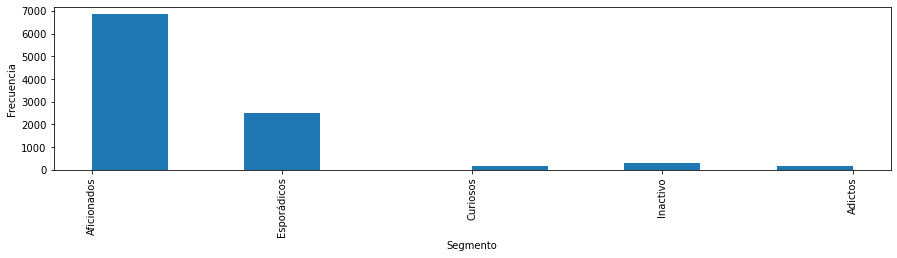

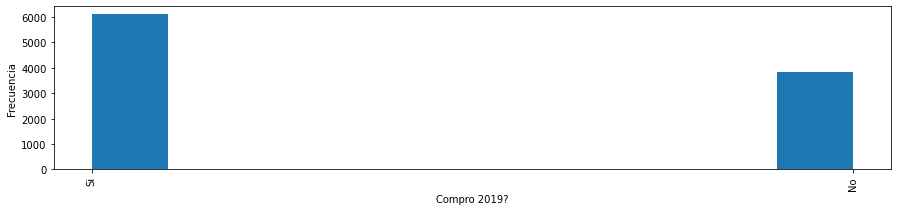

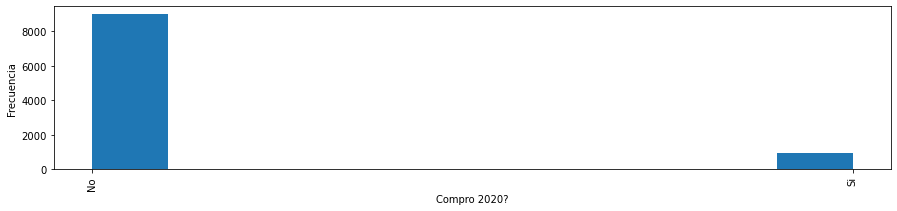

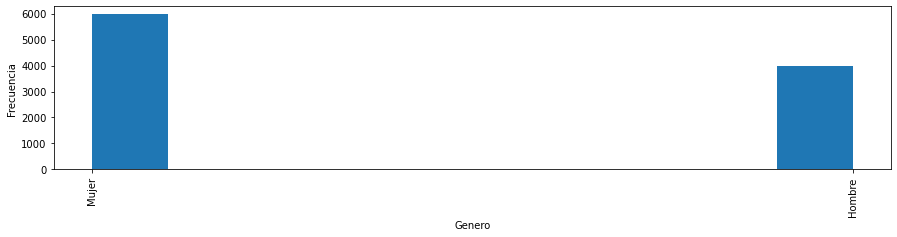

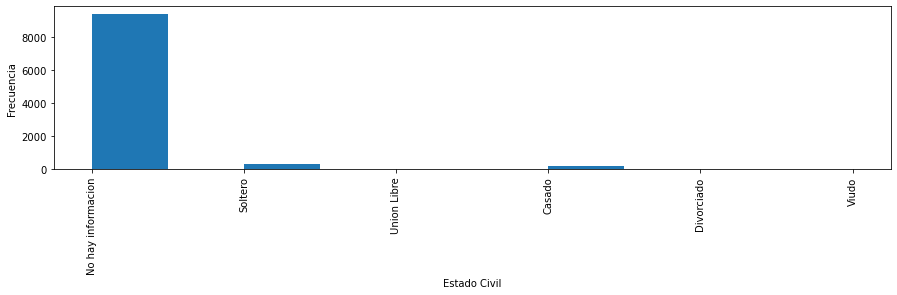

In [18]:
for i in nuevo_categoricas:
    plt.figure(figsize=(15,3))
    plt.hist(df_cotton[i])
    plt.xlabel(i)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)
    plt.show()

De la base de datos original sin modificar, los gráficos anteriores nos permiten tener una primera impresión sobre los clientes, es muy evidente que mayoría de estos son aficionados o esporádicos y que los demás representan una minoría; en cuanto a si compraron en el año 2019, una porción mayor lo sí lo hizo, en el año 2020 una abrumadora cantidad de clientes no lo hizo, esto es algo que claramente es llamativo y debe analizarse de acuerdo a las características del negocio para saber qué factores influyeron, tal vez hubo un factor externo muy fuerte como la pandemia que causo la disminución en las ventas durante el año 2020. Finalmente tenemos un mayor número de compradoras mujeres y en cuanto al estado civil, la gran mayoría de los datos se encuentran categorizados como “No hay información” por lo cual es poco probable que este campo sea de utilidad en el futuro análisis. 

### Gráficos de numero de transacciones por segmentos en 2019 y 2020

Text(0.5, 1.0, 'Nro de transacciones por segmento en 2020')

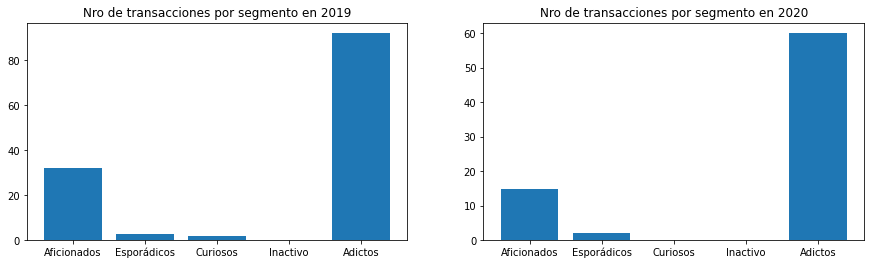

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15,4))
ax[0].bar(x=df_cotton.Segmento, height=df_cotton['Nro Transacciones 2019'])
ax[0].set_title('Nro de transacciones por segmento en 2019')
ax[1].bar(x=df_cotton.Segmento, height=df_cotton['Nro Transacciones 2020'])
ax[1].set_title('Nro de transacciones por segmento en 2020')

### Gráficos de Monto comprado por segmentos en 2019 y 2020

Text(0.5, 1.0, 'Monto comprado por segmento en 2020')

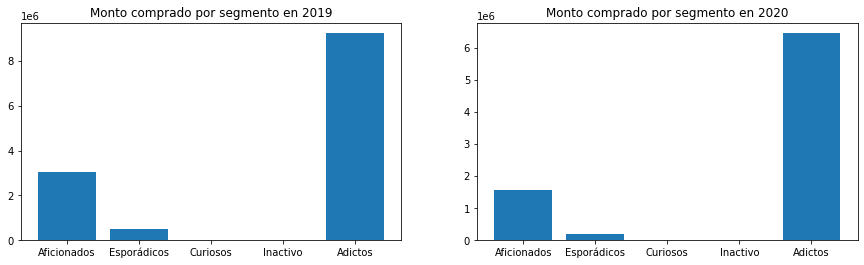

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (15,4))
ax[0].bar(x=df_cotton.Segmento, height=df_cotton['Monto Comprado 2019?'])
ax[0].set_title('Monto comprado por segmento en 2019')
ax[1].bar(x=df_cotton.Segmento, height=df_cotton['Monto Comprado 2020'])
ax[1].set_title('Monto comprado por segmento en 2020')

### Gráfico de edad por clientes

Text(0.5, 1.0, 'Edad de los clientes')

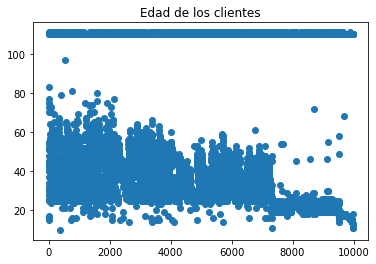

In [21]:
plt.scatter(df_cotton.Cedula, df_cotton.Edad)
plt.title("Edad de los clientes")

Se observa una gran cantidad de registros de edad por encima de los 100 años, que son en total:

In [22]:
df_cotton.Edad[df_cotton.Edad>100].count()

1046

Porcentaje de registros que indican más de 100 años:

In [23]:
(df_cotton.Edad[df_cotton.Edad>100].count()/(df_cotton.Cedula.count()))*100

10.485164394546914

### Boxplot o gráfico de caja y vigotes

Este gráfico nos indica la dispersión de los datos de interés, la caja en su límite inferior representa el valor de Q1, el límite superior Q3, la línea que se encuentra en medio de esta es la mediana y los bigotes, en el límite inferior el bigote va hasta una distancia de Q1-1.5xIQR y en el límite superior el bigote llega hasta el valor obtenido por Q3+1.5xIQR. Los valores que están por fuera de los bigotes son llamados outliers o valores atípicos.

Se realizarán boxplot para las variables numéricas que nos puedan aportar conocimiento útil de los datos, por ejemplo, el campo día de nacimiento, Cédula del cliente y otros tantos más no se graficarán.  

In [24]:
nuevo_numericas= ['Monto Comprado 2019?', 'Nro Transacciones 2019', 'Monto Comprado 2020', 'Nro Transacciones 2020', 'Edad', 'Monto Total de ultima compra', 'Cantidad Articulos', 'Recencia (Tiempo transcurrido en semanas desde su ultima compra)', 'Frecuencia (Cantidad items comprados)', 'Monto - MARCA COTTON- B/quilla.', 'Monto - Brand Store Cucuta', 'Monto - MARCA COTTON- Bucaramanga', 'Monto - MARCA COTTON- Manizales', 'Monto - MARCA COTTON- Pereira', 'Monto - MARCA COTTON- Cartagena', 'Monto - MARCA COTTON- Pasto', 'Monto - MARCA COTTON- Cable Plaza']
nuevo_numericas

['Monto Comprado 2019?',
 'Nro Transacciones 2019',
 'Monto Comprado 2020',
 'Nro Transacciones 2020',
 'Edad',
 'Monto Total de ultima compra',
 'Cantidad Articulos',
 'Recencia (Tiempo transcurrido en semanas desde su ultima compra)',
 'Frecuencia (Cantidad items comprados)',
 'Monto - MARCA COTTON- B/quilla.',
 'Monto - Brand Store Cucuta',
 'Monto - MARCA COTTON- Bucaramanga',
 'Monto - MARCA COTTON- Manizales',
 'Monto - MARCA COTTON- Pereira',
 'Monto - MARCA COTTON- Cartagena',
 'Monto - MARCA COTTON- Pasto',
 'Monto - MARCA COTTON- Cable Plaza']

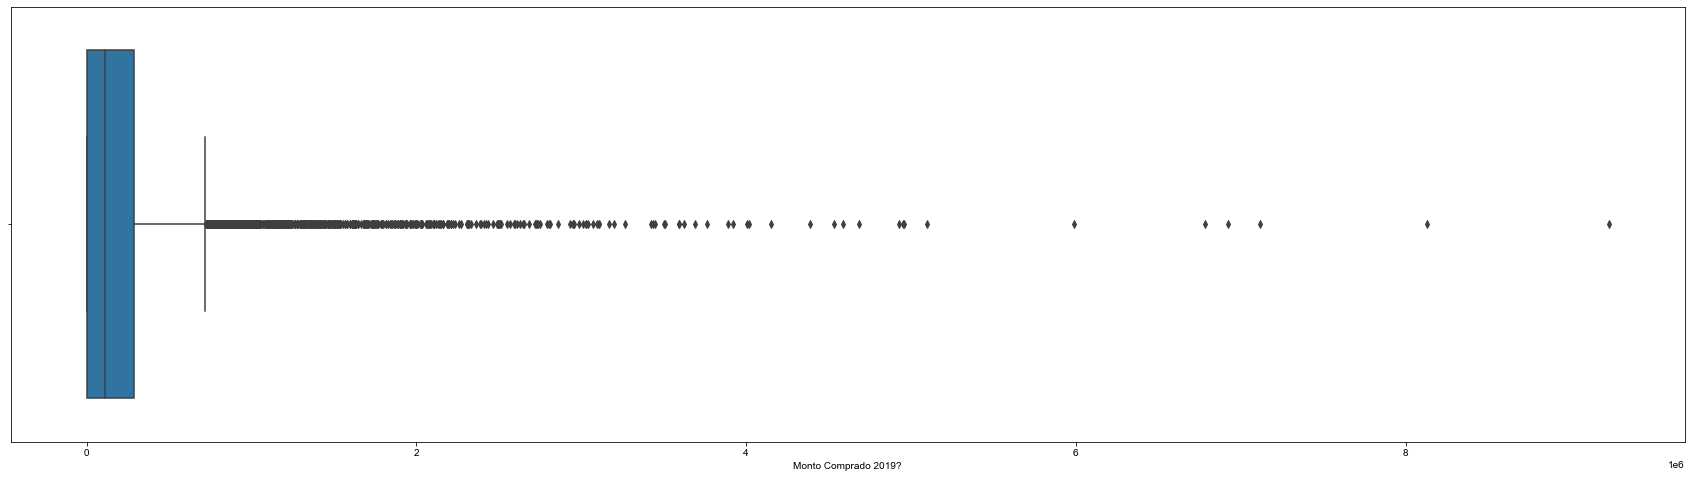

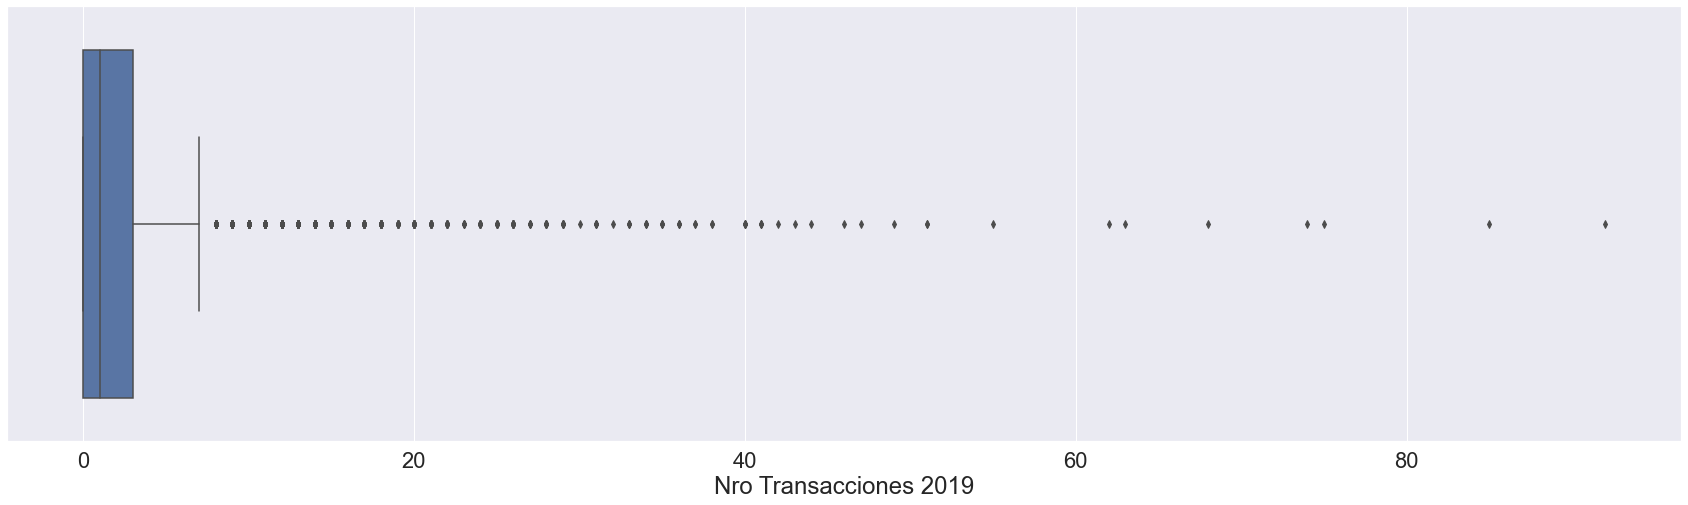

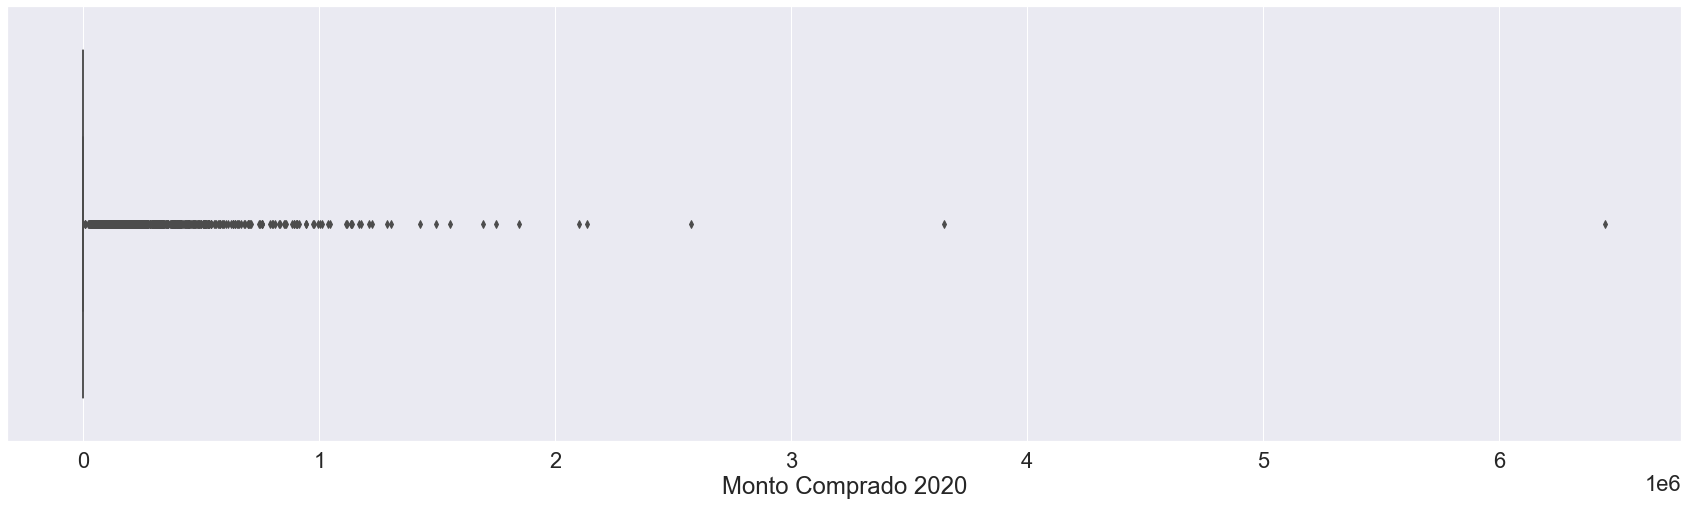

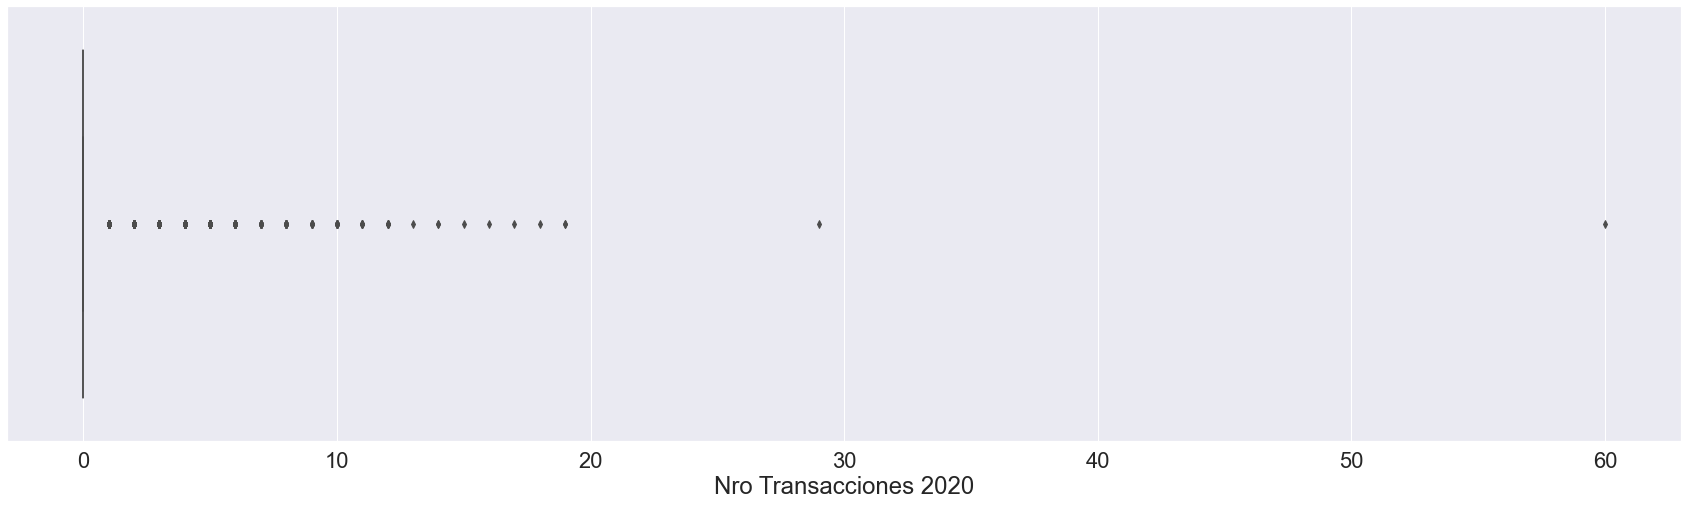

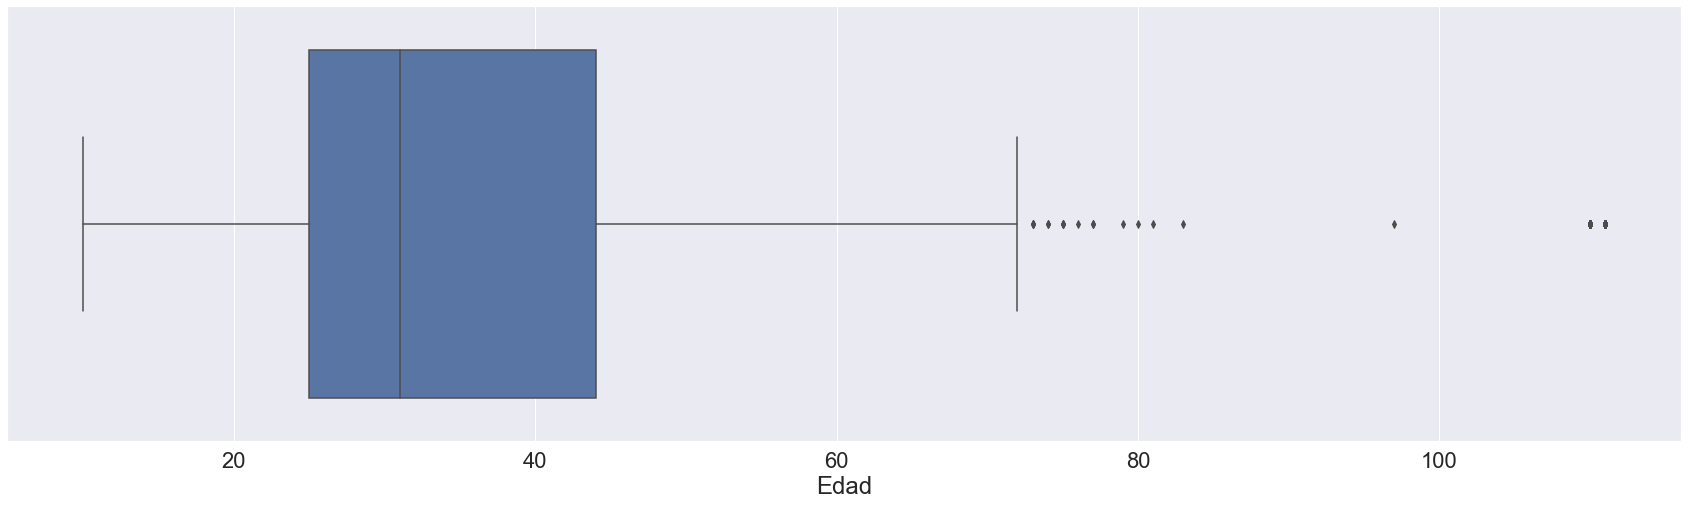

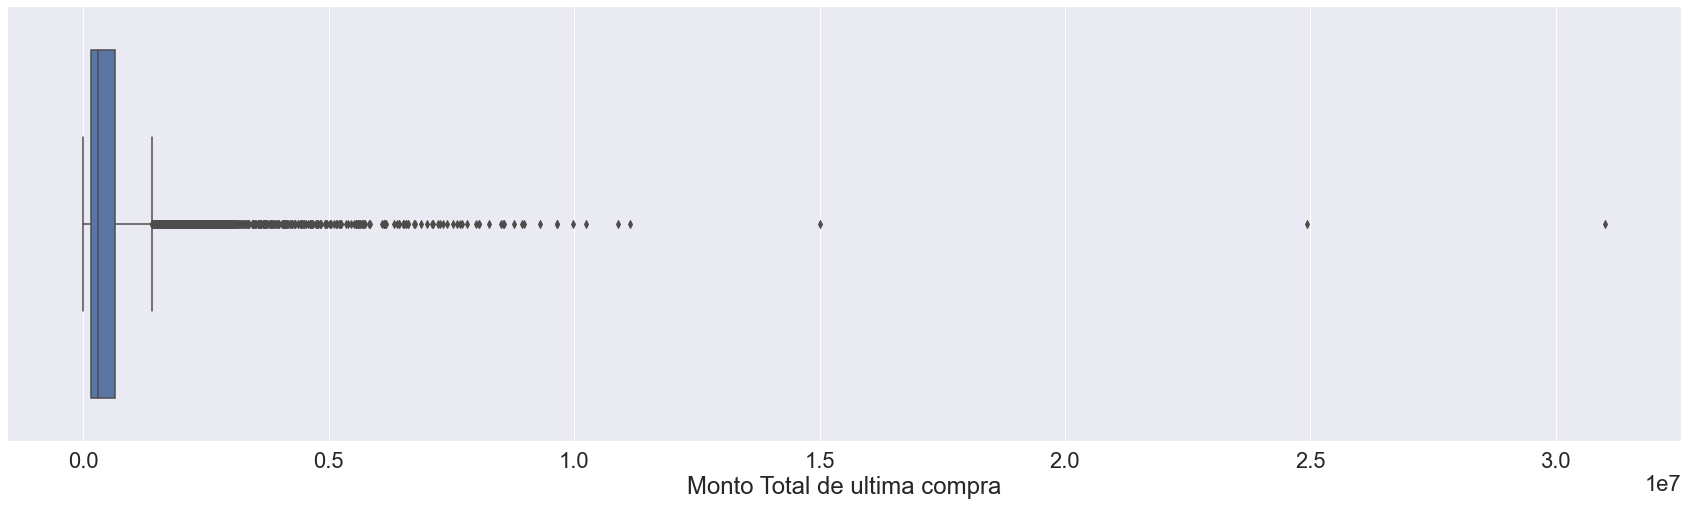

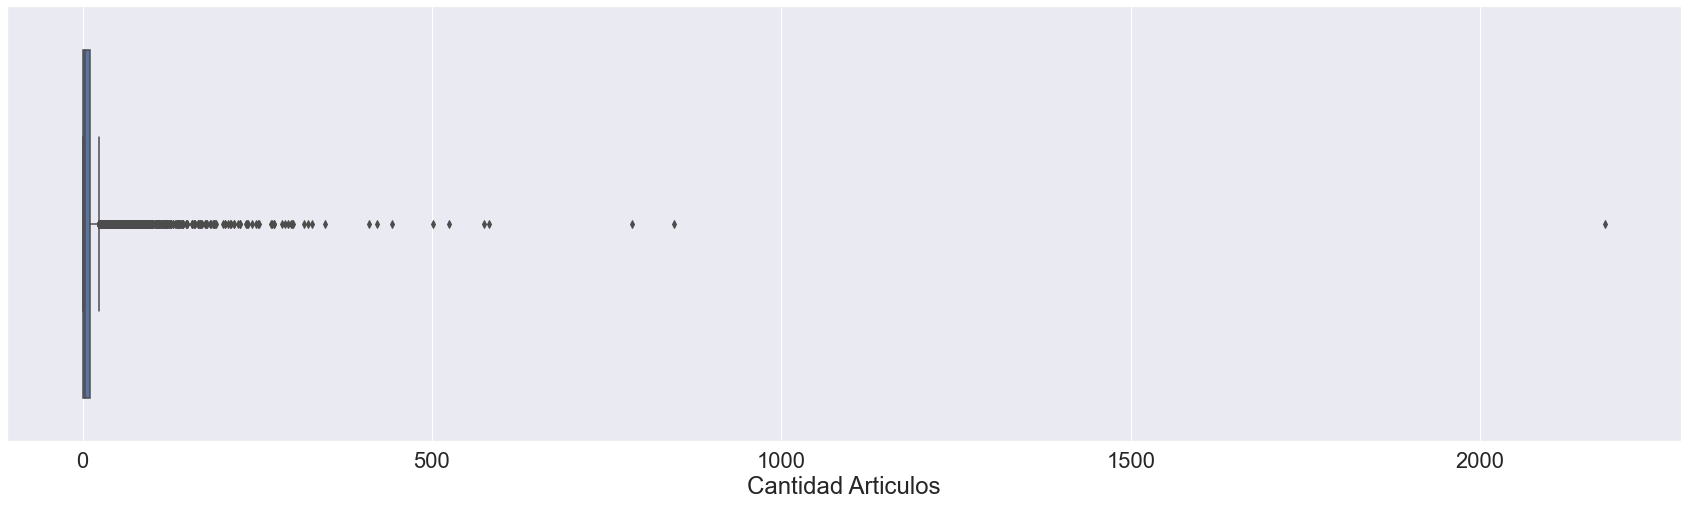

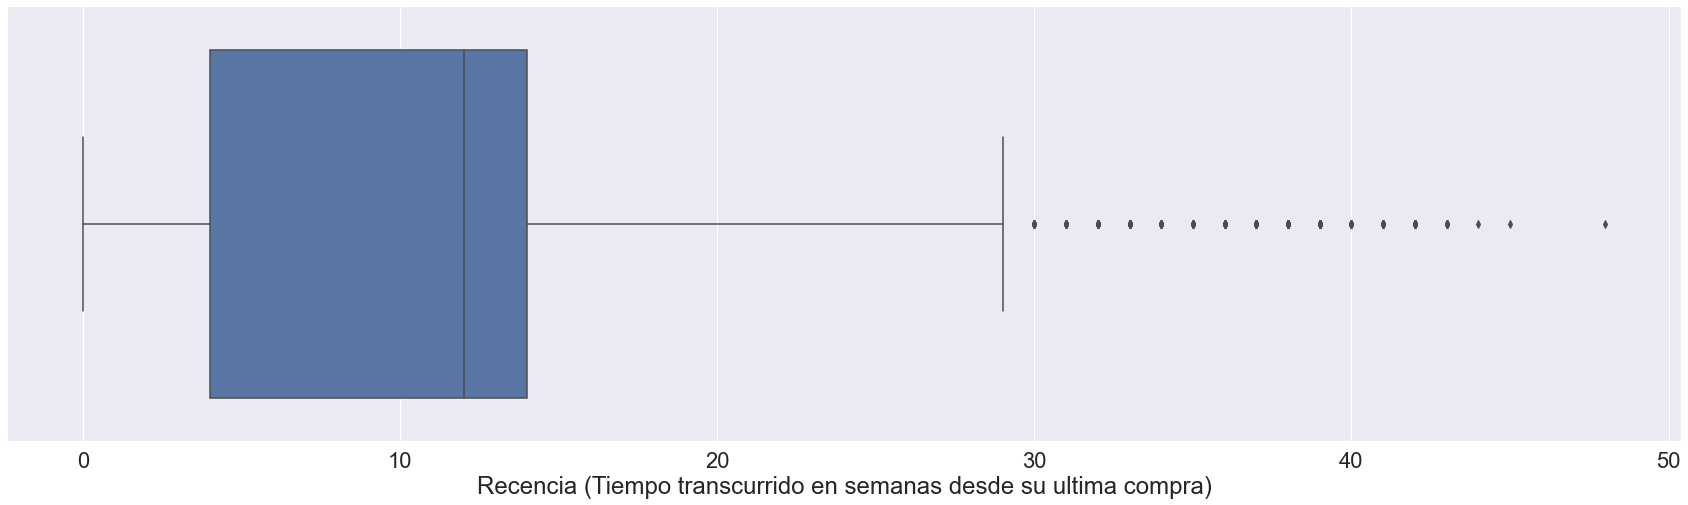

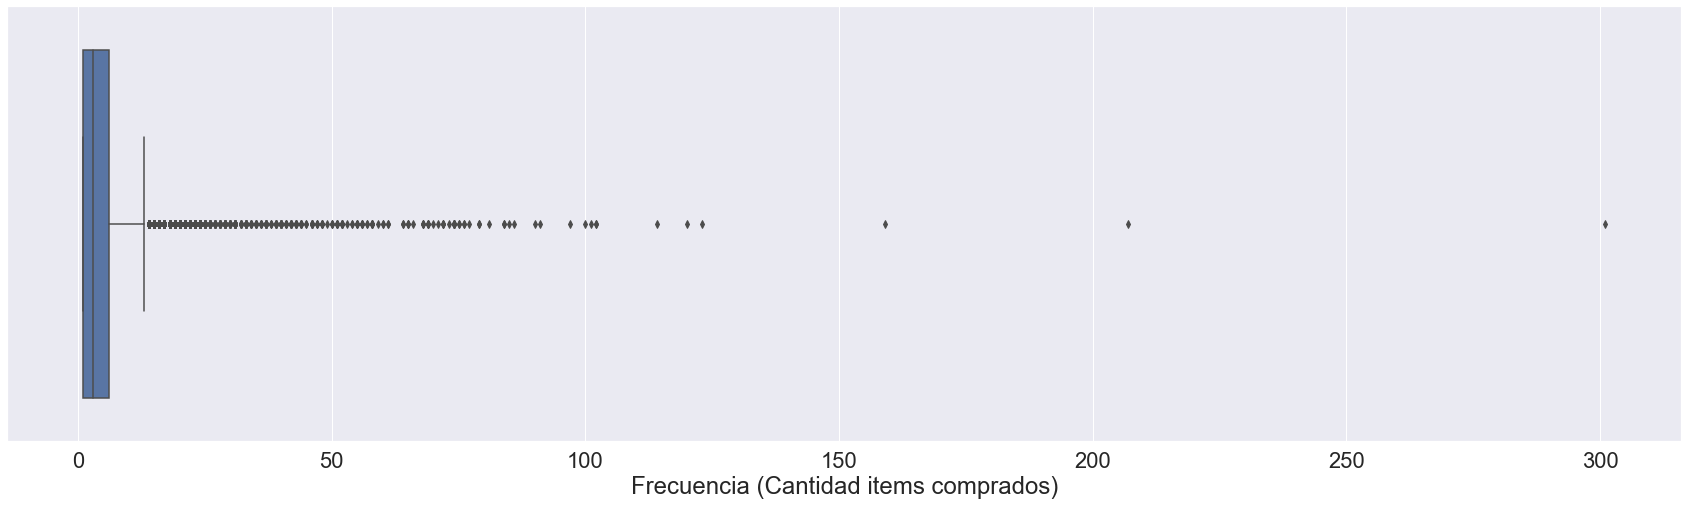

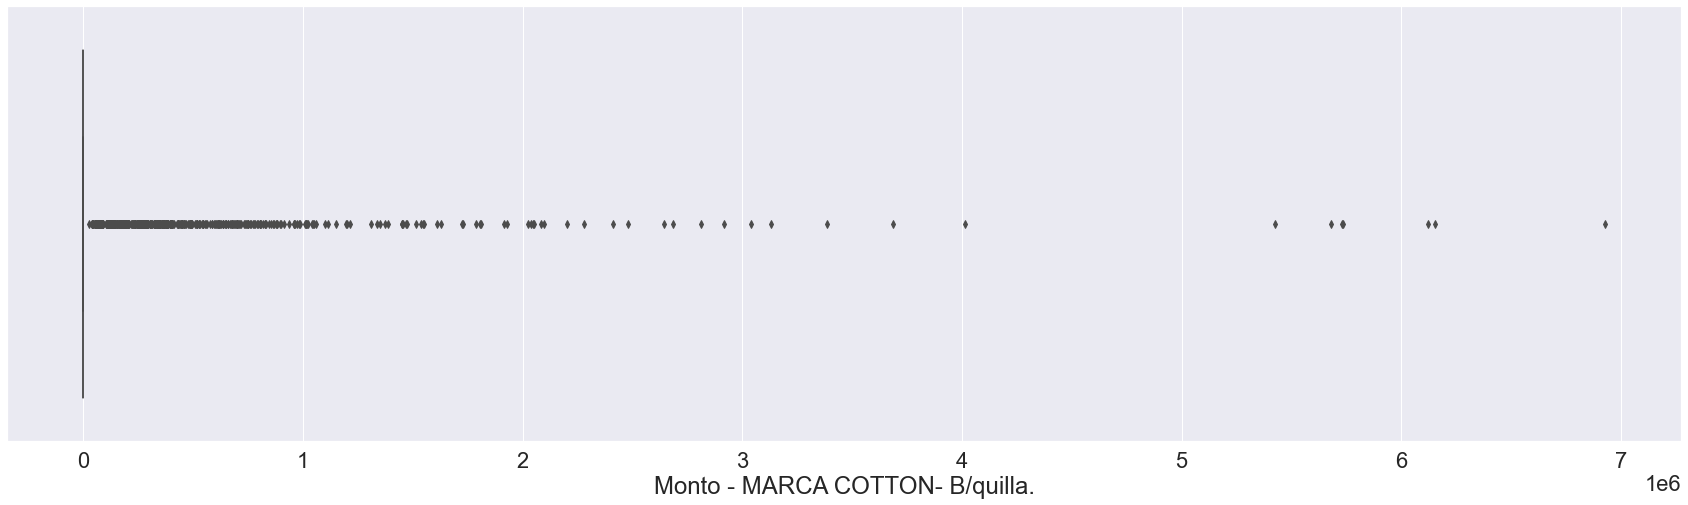

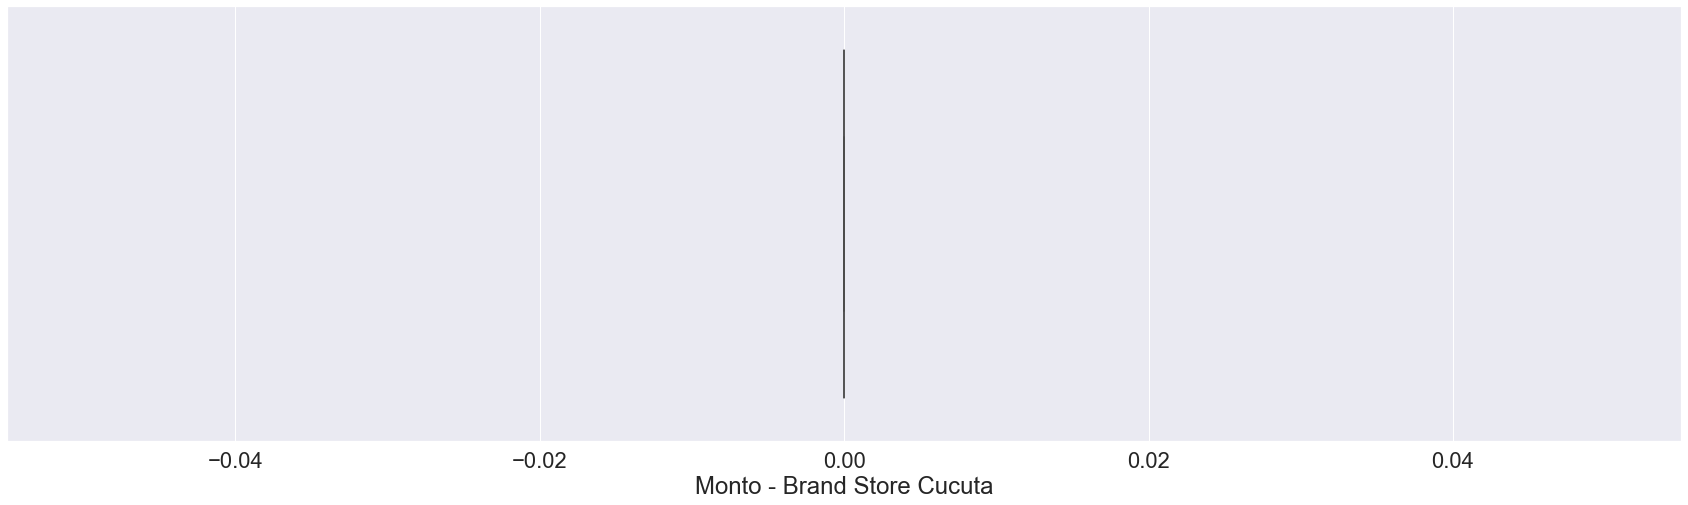

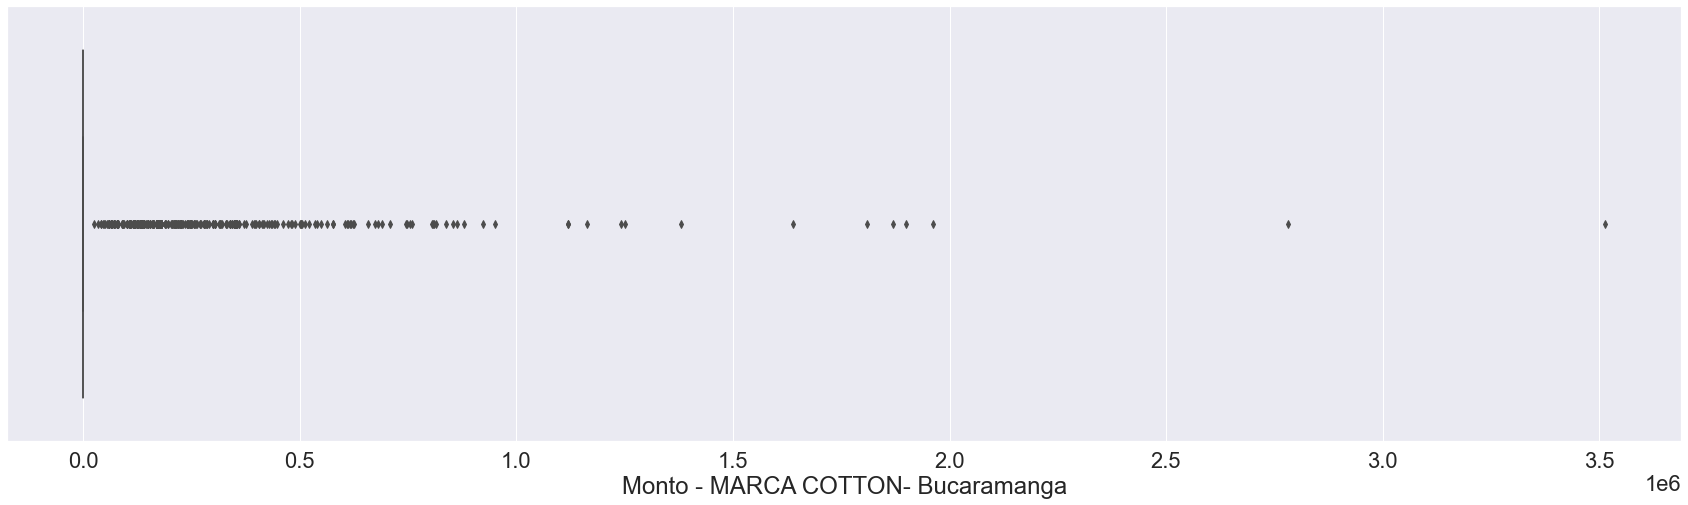

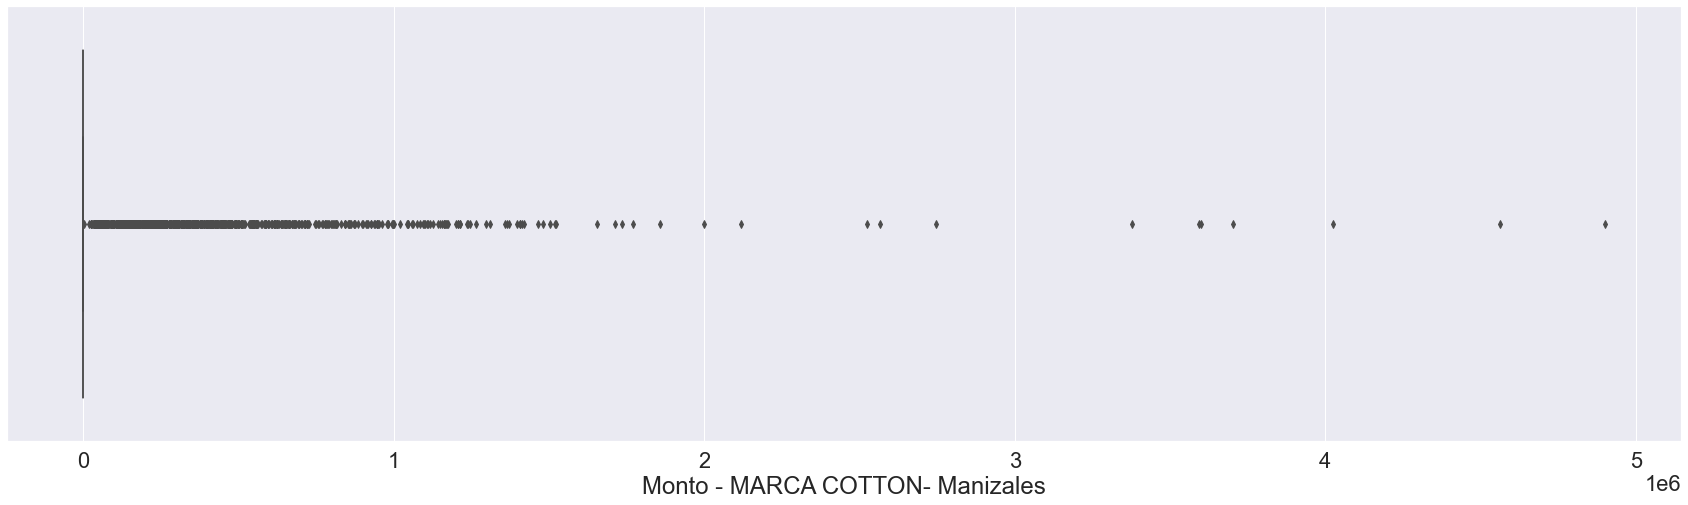

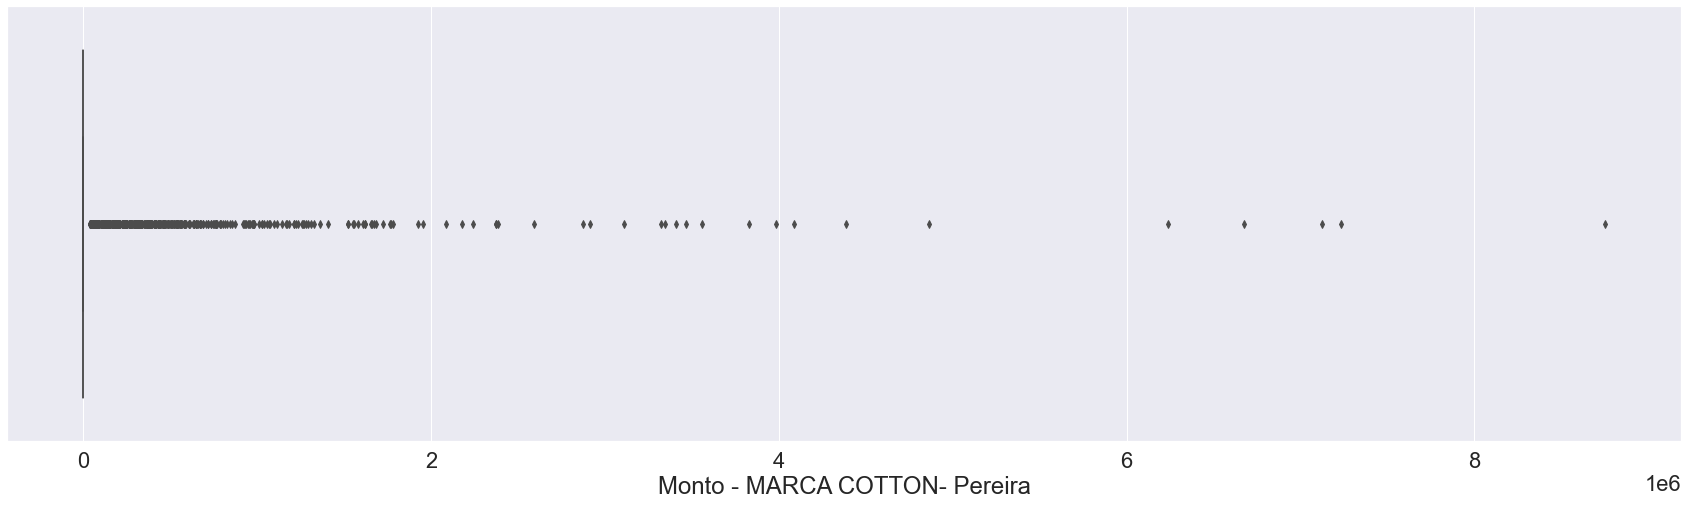

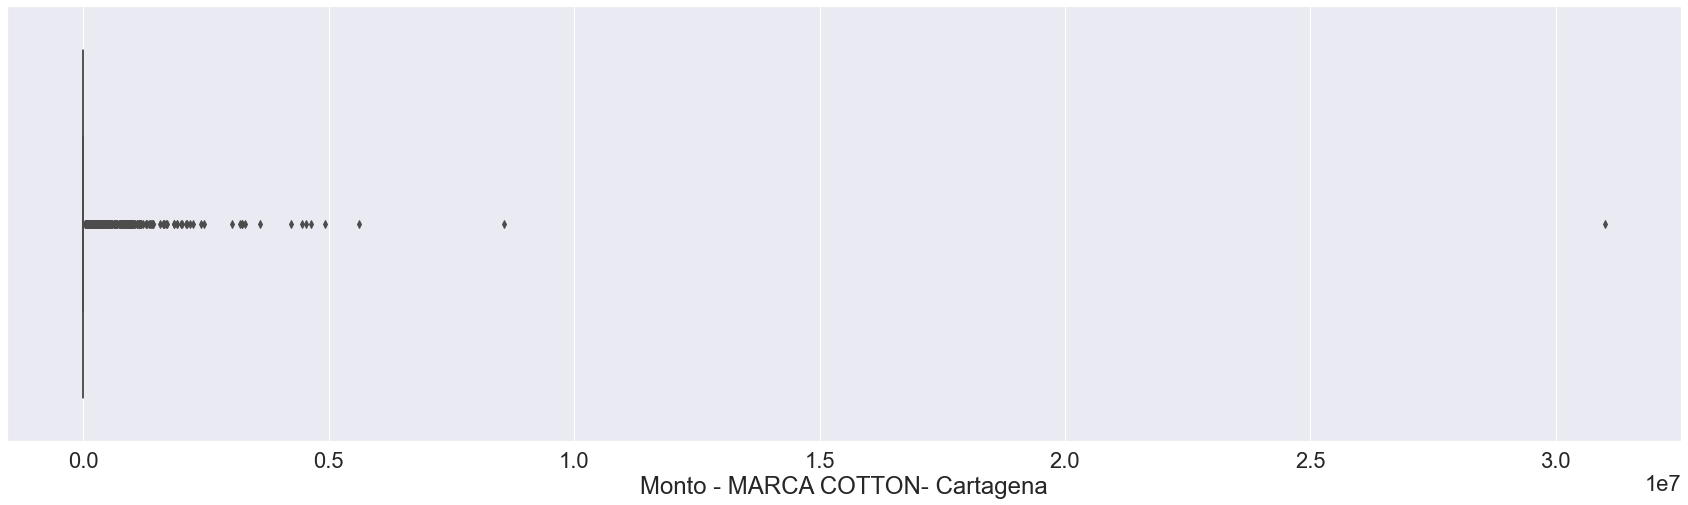

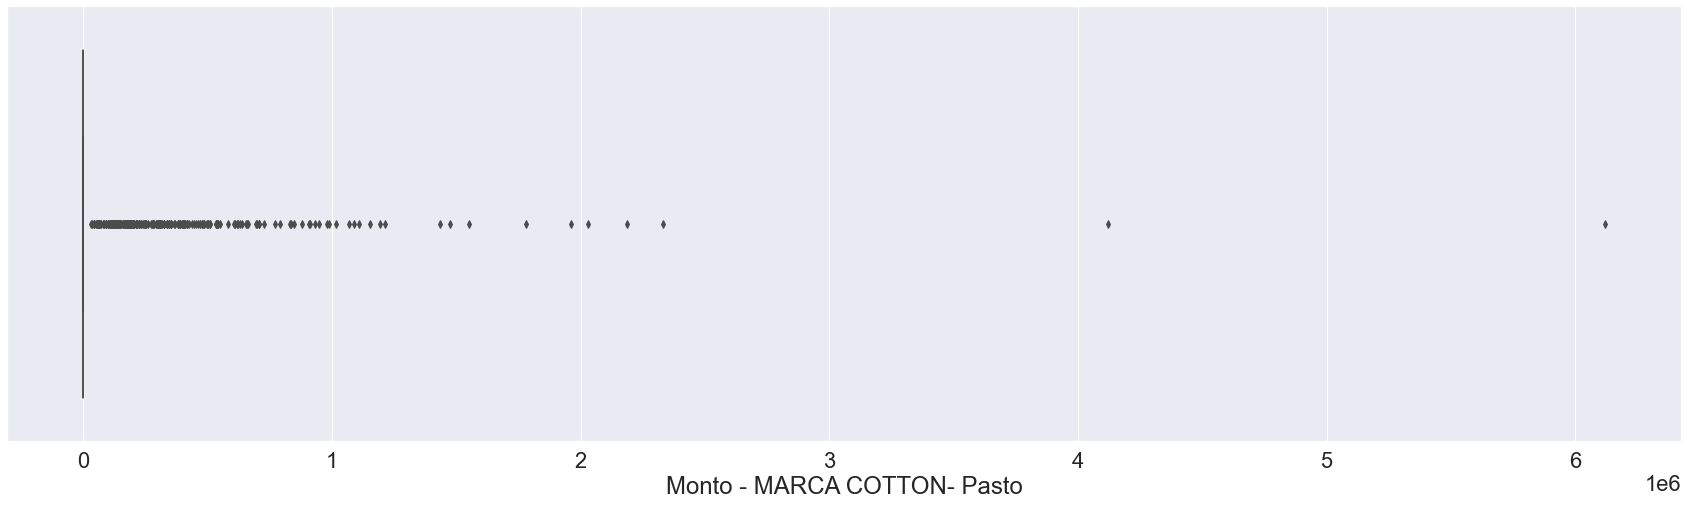

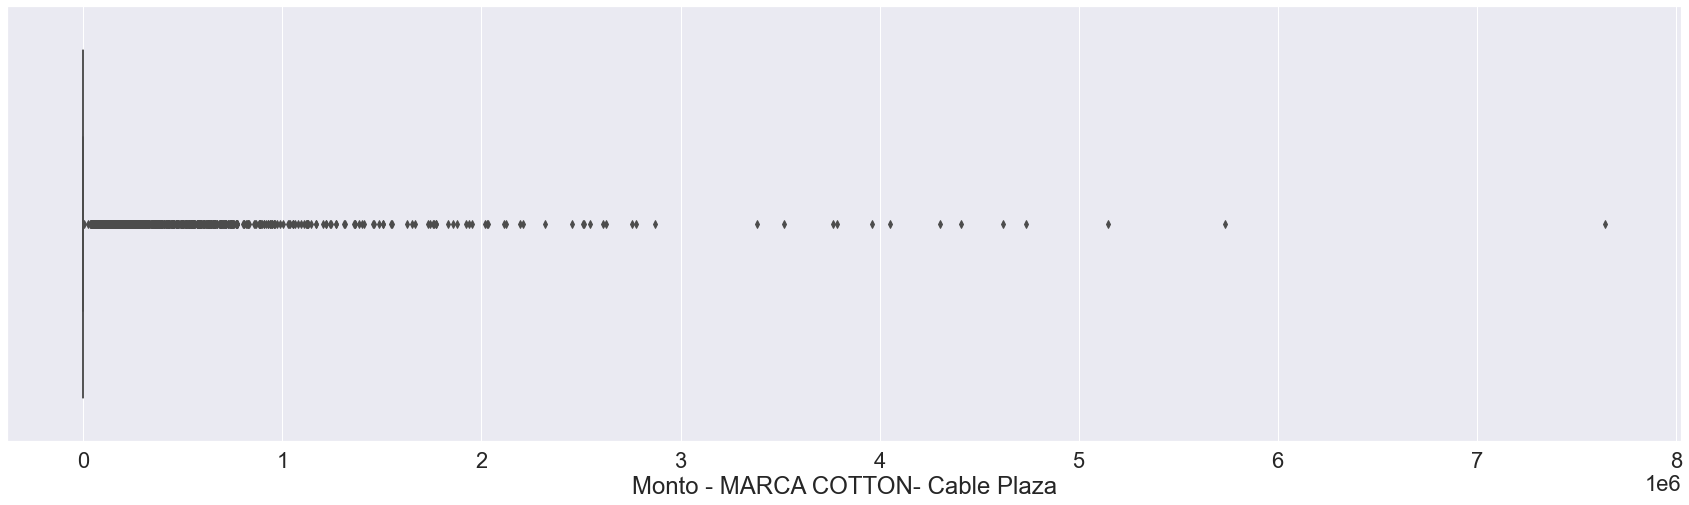

In [25]:
# Funciones para graficar los diagramas de cajas para las variables numéricas
def style_boxplot(df_cotton,title):
    fig, ax = plt.subplots(figsize=(30,8))
    ax = sns.boxplot(x=df_cotton)
    sns.set(font_scale = 2)

def make_boxplot(df_cotton):
    cols_num = [i for i in df_cotton.columns if i in nuevo_numericas]

    for i in cols_num:
        vdf_cotton = df_cotton[i]
        style_boxplot(vdf_cotton,i)

make_boxplot(df_cotton)

Es evidente una enorme cantidad de outliers en casi todos los campos graficados, seguramente esto es debido a la metodología de captura de datos, posteriormente se analizará esto para extraer la información que los datos nos pueden dar.

## Capítulo 2

### Diagnóstico general de la calidad de los datos

In [26]:
# Verifica si hay duplicados
df_cotton.duplicated().sum()

0

No hay ningún valor duplicado 

In [27]:
# Verifica si hay valores vacíos o nulos
df_cotton.isnull().sum()[df_cotton.isnull().sum()>0]

Mail               9976
Direccion          9976
Telefono Movil     9976
TelefonoOficina    9976
Telefono Casa      9976
dtype: int64

Las columnas Mail, Direccion, Telefono Movil, TelefonoOficina y Telefono Casa tienen todos sus registros nulos o vacíos.

Se creará un nuevo DataFrame sobre el cual se hará toda la depuración de los datos para que estos puedan ser utilizados posteriormente en diversos modelos.

In [28]:
df_new=df_cotton.copy()
df_new.head()

,Cedula,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Tipo de Contacto,...,TelefonoOficina,Telefono Casa,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza
0,1,Nombre Cliente 1,Aficionados,Si,No,264800,2,0,0,11001,...,NaN,NaN,0,0,0,0,0,0,0,0
1,2,Nombre Cliente 2,Esporádicos,Si,No,179900,1,0,0,11001,...,NaN,NaN,179900,0,0,0,0,0,0,0
2,3,Nombre Cliente 3,Aficionados,Si,No,189800,2,0,0,11101,...,NaN,NaN,451200,0,0,0,0,0,0,0
3,4,Nombre Cliente 4,Aficionados,Si,No,65900,1,0,0,11001,...,NaN,NaN,0,0,0,0,0,0,0,1859600
4,5,Nombre Cliente 5,Aficionados,Si,No,238800,2,0,0,11101,...,NaN,NaN,0,0,0,0,0,0,0,0


In [29]:
# Se eliminarán las columnas que tienen todos sus registros nulos
df_new.drop(['Mail', 'Direccion', 'Telefono Movil', 'TelefonoOficina', 'Telefono Casa'], axis=1, inplace=True)
df_new.head()

,Cedula,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Tipo de Contacto,...,Tel Ofc Valid?,Tel Casa Valido?,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza
0,1,Nombre Cliente 1,Aficionados,Si,No,264800,2,0,0,11001,...,No,Si,0,0,0,0,0,0,0,0
1,2,Nombre Cliente 2,Esporádicos,Si,No,179900,1,0,0,11001,...,No,Si,179900,0,0,0,0,0,0,0
2,3,Nombre Cliente 3,Aficionados,Si,No,189800,2,0,0,11101,...,No,Si,451200,0,0,0,0,0,0,0
3,4,Nombre Cliente 4,Aficionados,Si,No,65900,1,0,0,11001,...,No,Si,0,0,0,0,0,0,0,1859600
4,5,Nombre Cliente 5,Aficionados,Si,No,238800,2,0,0,11101,...,No,Si,0,0,0,0,0,0,0,0


In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 35 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Cedula                                                            9976 non-null   int64 
 1   Nombre Completo                                                   9976 non-null   object
 2   Segmento                                                          9976 non-null   object
 3   Compro 2019?                                                      9976 non-null   object
 4   Compro 2020?                                                      9976 non-null   object
 5   Monto Comprado 2019?                                              9976 non-null   int64 
 6   Nro Transacciones 2019                                            9976 non-null   int64 
 7   Monto Comprado 2020                       

### Análisis de datos por fuera de los parámetros normales del negocio 

Para analizar los valores por fuera de los parámetros normales y los valores atípicos  nos basaremos en los gráficos de caja y bigote hechos anteriormente a las variables numéricas de interés.

La variable edad es de especial interés puesto que en la gráfica de dispersión hecha anteriormente vimos cómo había una notable cantidad de registros por encima de los 100 años, asumiremos que estos registros no corresponden a la realidad y por lo tanto se reemplazarán con la mediana que corresponde al análisis de los datos excluyendo a los registros de mas de 100 años.

In [31]:
series_edad=df_cotton.Edad[df_cotton.Edad<100]

In [32]:
series_edad

1       54
2       55
3       48
4       44
5       42
        ..
9965    13
9968    13
9973    11
9974    11
9975    18
Name: Edad, Length: 8930, dtype: int64

Moda de la serie de datos Edad que no tiene los valores mayores de 100 años

In [33]:
series_edad.mode()

0    26
dtype: int64

Media de la serie de datos Edad que no tiene los valores mayores de 100 años

In [34]:
series_edad.mean()

32.1451287793953

Mediana de la serie de datos Edad que no tiene los valores mayores de 100 años

In [35]:
series_edad.median()

30.0

En el nuevo DataFrame se reemplazarán todos los valores mayores a 100 años con la mediana de los datos que registran menos de esta Edad.

In [36]:
df_new.Edad

0       111
1        54
2        55
3        48
4        44
       ... 
9971    110
9972    110
9973     11
9974     11
9975     18
Name: Edad, Length: 9976, dtype: int64

In [37]:
df_new.groupby('Edad').agg({'Edad':['count']})

,Edad
,count
Edad,
10,1
11,3
13,3
14,22
15,47
...,...
81,1
83,1


In [38]:
df_new.Edad.replace(110,series_edad.median(), inplace=True)

In [39]:
df_new.Edad.replace(111,series_edad.median(), inplace=True)

In [40]:
df_new.describe([0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9]).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,max
Cedula,9976.0,4.988500e+03,2.879967e+03,1.0,998.5,1996.0,2494.75,2993.5,3991.0,4988.5,5986.0,6983.5,7482.25,7981.0,8978.5,9976.0
Monto Comprado 2019?,9976.0,2.438670e+05,4.564346e+05,0.0,0.0,0.0,0.00,0.0,45900.0,113485.0,161820.0,235710.0,288625.00,359730.0,637380.0,9231860.0
Nro Transacciones 2019,9976.0,2.462711e+00,4.698831e+00,0.0,0.0,0.0,0.00,0.0,1.0,1.0,2.0,2.0,3.00,4.0,6.0,92.0
Monto Comprado 2020,9976.0,2.506701e+04,1.322477e+05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,6448400.0
Nro Transacciones 2020,9976.0,2.635325e-01,1.287152e+00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,60.0
Tipo de Contacto,9976.0,9.268515e+03,3.745491e+03,1.0,1001.0,10001.0,10101.00,11001.0,11001.0,11100.0,11101.0,11101.0,11101.00,11101.0,11101.0,11101.0
Fecha Nacimiento,9976.0,1.955487e+07,1.698869e+06,0.0,19001203.0,19630318.0,19660930.00,19700107.5,19750619.0,19790608.5,19820110.0,19840816.0,19850921.25,19870112.0,19900127.5,20001020.0
Dia Nacimiento,9976.0,1.510876e+01,9.083942e+00,1.0,2.0,6.0,7.00,9.0,12.0,15.0,18.0,21.0,23.00,24.0,28.0,31.0
Edad,9976.0,3.192021e+01,1.007504e+01,10.0,21.0,24.0,25.00,26.0,29.0,30.0,31.0,35.0,37.00,40.0,47.0,97.0
Monto Total de ultima compra,9976.0,5.902064e+05,9.577543e+05,1900.0,100320.0,134900.0,154800.00,172800.0,226780.0,303700.0,400700.0,542525.0,652525.00,800400.0,1296815.0,31004180.0


Las columnas: 'Monto - MARCA COTTON- B/quilla.', 'Monto - Brand Store Cucuta', 'Monto - MARCA COTTON- Bucaramanga', 'Monto - MARCA COTTON- Manizales', 'Monto - MARCA COTTON- Pereira', 'Monto - MARCA COTTON- Cartagena', 'Monto - MARCA COTTON- Pasto' y 'Monto - MARCA COTTON- Cable Plaza'; poseen muchos registros con el valor 0, esto es debido a que cuando un cliente hacia una compra en alguno de estos, en los otros se registraba el valor de 0, por lo tanto si miramos las medidas de tendencia central, estas van a estar muy sesgadas por la gran cantidad registros con 0, se evaluará cada una de las columnas mencionadas sin los registros con 0.

In [41]:
monto_quilla=df_new['Monto - MARCA COTTON- B/quilla.'][df_new['Monto - MARCA COTTON- B/quilla.']>0]

In [42]:
monto_quilla

1       179900
2       451200
5       387600
56      719500
57      188830
         ...  
9763    169900
9779    179900
9845    103920
9850    987200
9912    303300
Name: Monto - MARCA COTTON- B/quilla., Length: 499, dtype: int64

In [43]:
monto_quilla.describe([0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9])

count    4.990000e+02
mean     5.758197e+05
std      8.610891e+05
min      2.754000e+04
10%      1.106200e+05
20%      1.359000e+05
25%      1.633250e+05
30%      1.799000e+05
40%      2.446000e+05
50%      3.197000e+05
60%      3.782600e+05
70%      5.231800e+05
75%      6.368800e+05
80%      7.438400e+05
90%      1.202294e+06
max      6.928460e+06
Name: Monto - MARCA COTTON- B/quilla., dtype: float64

In [44]:
monto_quilla.count()

499

In [45]:
monto_cucuta= df_new['Monto - Brand Store Cucuta'][df_new['Monto - Brand Store Cucuta']>0]

In [46]:
monto_cucuta

Series([], Name: Monto - Brand Store Cucuta, dtype: int64)

Todos los valores registrados en 'Monto - Brand Store Cucuta' corresponden a 0.

In [47]:
monto_manga= df_new['Monto - MARCA COTTON- Bucaramanga'][df_new['Monto - MARCA COTTON- Bucaramanga']>0]

In [48]:
monto_manga

10        72900
18       339800
137      129900
139      284700
141      119900
         ...   
9829    1250915
9889     179900
9900     549500
9905     521400
9943     129900
Name: Monto - MARCA COTTON- Bucaramanga, Length: 347, dtype: int64

In [49]:
monto_manizales= df_new['Monto - MARCA COTTON- Manizales'][df_new['Monto - MARCA COTTON- Manizales']>0]

In [50]:
monto_manizales

11      139900
12      270700
13      139800
14       79900
16      329700
         ...  
9946     89900
9949    108640
9951     53900
9953     99920
9959    239700
Name: Monto - MARCA COTTON- Manizales, Length: 1139, dtype: int64

In [51]:
monto_manizales.describe([0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9])

count    1.139000e+03
mean     3.575264e+05
std      4.366616e+05
min      1.900000e+03
10%      7.281000e+04
20%      1.198000e+05
25%      1.299000e+05
30%      1.399000e+05
40%      1.742080e+05
50%      2.178000e+05
60%      2.820600e+05
70%      3.683880e+05
75%      4.292000e+05
80%      5.025000e+05
90%      7.784880e+05
max      4.900940e+06
Name: Monto - MARCA COTTON- Manizales, dtype: float64

In [52]:
monto_pereira= df_new['Monto - MARCA COTTON- Pereira'][df_new['Monto - MARCA COTTON- Pereira']>0]

In [53]:
monto_pereira

67      149900
83      124900
84      134900
87      169900
94       79900
         ...  
9861    203800
9863    239900
9882    151920
9965    107900
9969    379700
Name: Monto - MARCA COTTON- Pereira, Length: 519, dtype: int64

In [54]:
monto_pereira.describe([0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9])

count    5.190000e+02
mean     5.698682e+05
std      9.406623e+05
min      3.645000e+04
10%      8.908800e+04
20%      1.298120e+05
25%      1.363500e+05
30%      1.647360e+05
40%      2.002600e+05
50%      2.808000e+05
60%      3.629000e+05
70%      4.854000e+05
75%      5.660650e+05
80%      6.897560e+05
90%      1.241380e+06
max      8.752705e+06
Name: Monto - MARCA COTTON- Pereira, dtype: float64

In [55]:
monto_cartagena= df_new['Monto - MARCA COTTON- Cartagena'][df_new['Monto - MARCA COTTON- Cartagena']>0]

In [56]:
monto_cartagena

33       72900
44      139900
60      536400
61      266160
62      409600
         ...  
9517    317700
9640    543360
9756    119900
9860    124900
9919    489120
Name: Monto - MARCA COTTON- Cartagena, Length: 373, dtype: int64

In [57]:
monto_cartagena.describe([0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9])

count    3.730000e+02
mean     7.107165e+05
std      1.803912e+06
min      3.490000e+04
10%      1.199000e+05
20%      1.674400e+05
25%      1.856000e+05
30%      1.998000e+05
40%      2.557800e+05
50%      3.457600e+05
60%      4.563060e+05
70%      6.167600e+05
75%      7.535400e+05
80%      8.612000e+05
90%      1.325702e+06
max      3.100418e+07
Name: Monto - MARCA COTTON- Cartagena, dtype: float64

In [58]:
monto_pasto= df_new['Monto - MARCA COTTON- Pasto'][df_new['Monto - MARCA COTTON- Pasto']>0]

In [59]:
monto_pasto

86      353214
128     406220
129     630726
130     640062
131     184884
         ...  
9879    120807
9883    126387
9885    132930
9898     59427
9916    111920
Name: Monto - MARCA COTTON- Pasto, Length: 243, dtype: int64

In [60]:
monto_pasto.describe([0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9])

count    2.430000e+02
mean     4.136340e+05
std      5.764932e+05
min      2.994000e+04
10%      1.012770e+05
20%      1.301070e+05
25%      1.406970e+05
30%      1.620432e+05
40%      1.896408e+05
50%      2.462640e+05
60%      3.237702e+05
70%      4.059620e+05
75%      4.723555e+05
80%      5.353936e+05
90%      8.434754e+05
max      6.119336e+06
Name: Monto - MARCA COTTON- Pasto, dtype: float64

In [61]:
monto_cable= df_new['Monto - MARCA COTTON- Cable Plaza'][df_new['Monto - MARCA COTTON- Cable Plaza']>0]

In [62]:
monto_cable

3       1859600
9        134900
13        53900
15       247840
16      1037000
         ...   
9873     159920
9908     476480
9909     356560
9952     151920
9964     174240
Name: Monto - MARCA COTTON- Cable Plaza, Length: 984, dtype: int64

In [63]:
monto_cable.describe([0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9])

count    9.840000e+02
mean     4.475825e+05
std      6.521900e+05
min      5.700000e+03
10%      8.264100e+04
20%      1.249000e+05
25%      1.349000e+05
30%      1.519200e+05
40%      1.837200e+05
50%      2.398000e+05
60%      3.058000e+05
70%      4.297000e+05
75%      5.179250e+05
80%      6.003000e+05
90%      9.141460e+05
max      7.644480e+06
Name: Monto - MARCA COTTON- Cable Plaza, dtype: float64

Se crea una nueva columna llamada Suma Montos donde se sumaran todas las 8 columnas que tienen valores de montos para cada cliente.

In [64]:
df_new['Suma montos']=df_new['Monto - MARCA COTTON- B/quilla.'] + df_new['Monto - Brand Store Cucuta'] + df_new['Monto - MARCA COTTON- Bucaramanga'] + df_new['Monto - MARCA COTTON- Manizales'] + df_new['Monto - MARCA COTTON- Pereira'] + df_new['Monto - MARCA COTTON- Cartagena'] + df_new['Monto - MARCA COTTON- Pasto'] + df_new['Monto - MARCA COTTON- Cable Plaza']

In [65]:
df_new.head()

,Cedula,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Tipo de Contacto,...,Tel Casa Valido?,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza,Suma montos
0,1,Nombre Cliente 1,Aficionados,Si,No,264800,2,0,0,11001,...,Si,0,0,0,0,0,0,0,0,0
1,2,Nombre Cliente 2,Esporádicos,Si,No,179900,1,0,0,11001,...,Si,179900,0,0,0,0,0,0,0,179900
2,3,Nombre Cliente 3,Aficionados,Si,No,189800,2,0,0,11101,...,Si,451200,0,0,0,0,0,0,0,451200
3,4,Nombre Cliente 4,Aficionados,Si,No,65900,1,0,0,11001,...,Si,0,0,0,0,0,0,0,1859600,1859600
4,5,Nombre Cliente 5,Aficionados,Si,No,238800,2,0,0,11101,...,Si,0,0,0,0,0,0,0,0,0


### Modelo Determinístico

Es un modelo cuya solución para determinadas condiciones es siempre la misma y única, allí los datos se deben conocer con certeza, es decir que cuando el modelo se analiza, se tiene disponible toda la información necesaria para la toma de decisiones. En un modelo determinístico las mismas entrada producen siempre las mismas salidas, no contemplándose la existencia del azar ni el principio de incertidumbre.

### Modelo Probabilístico

Como su nombre lo indica es un modelo en donde las acciones o alternativas posibles están signadas por el azar.  El modelo probabilístico o estocástico es no determinista, es decir las acciones que se buscan predecir si están bajo la influencia del azar.

La diferencia radica en la salida de cada modelo, los probabilísticos nos brindan un resultado que interpretamos como probabilidad, esta en sí no resuelve como tal un problema, quien usa el modelo determina que hacer en función del resultado obtenido, mientras que en los modelos determinísticos como no tomamos en cuenta el azar puesto que se asume una perfección en los datos encontramos resultados bajo condiciones ideales, que se tiende a usar en situaciones hipotéticas como entornos simulados.    

### Capítulo 3

### Depuración de la base de datos

In [66]:
df_new.columns

Index(['Cedula', 'Nombre Completo', 'Segmento', 'Compro 2019?', 'Compro 2020?',
       'Monto Comprado 2019?', 'Nro Transacciones 2019', 'Monto Comprado 2020',
       'Nro Transacciones 2020', 'Tipo de Contacto', 'Es Contactable',
       'Ciudad de Residencia', 'Genero', 'Estado Civil', 'Fecha Nacimiento',
       'Mes Nacimiento', 'Dia Nacimiento', 'Edad',
       'Monto Total de ultima compra', 'Cantidad Articulos',
       'Recencia (Tiempo transcurrido en semanas desde su ultima compra)',
       'Frecuencia (Cantidad items comprados)', 'Direccion Valido?',
       'Mail Valido?', 'Cel Valido?', 'Tel Ofc Valid?', 'Tel Casa Valido?',
       'Monto - MARCA COTTON- B/quilla.', 'Monto - Brand Store Cucuta',
       'Monto - MARCA COTTON- Bucaramanga', 'Monto - MARCA COTTON- Manizales',
       'Monto - MARCA COTTON- Pereira', 'Monto - MARCA COTTON- Cartagena',
       'Monto - MARCA COTTON- Pasto', 'Monto - MARCA COTTON- Cable Plaza',
       'Suma montos'],
      dtype='object')

Se depurará la base de datos eliminando las columnas que no pueden ser usadas para generar modelos o que por falta información no nos aporten conocimiento de los clientes. 

In [67]:
df_new.drop(['Nombre Completo', 'Tipo de Contacto', 'Es Contactable', 'Estado Civil', 'Fecha Nacimiento', 'Mes Nacimiento', 'Dia Nacimiento', 'Direccion Valido?', 'Mail Valido?', 'Cel Valido?', 'Tel Ofc Valid?', 'Tel Casa Valido?'], axis=1, inplace=True)

In [68]:
df_new.head()

,Cedula,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Ciudad de Residencia,Genero,...,Frecuencia (Cantidad items comprados),Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza,Suma montos
0,1,Aficionados,Si,No,264800,2,0,0,BUCARAMANGA,Mujer,...,6,0,0,0,0,0,0,0,0,0
1,2,Esporádicos,Si,No,179900,1,0,0,BARRANQUILLA,Hombre,...,1,179900,0,0,0,0,0,0,0,179900
2,3,Aficionados,Si,No,189800,2,0,0,BARRANQUILLA,Mujer,...,13,451200,0,0,0,0,0,0,0,451200
3,4,Aficionados,Si,No,65900,1,0,0,MANIZALES,Mujer,...,17,0,0,0,0,0,0,0,1859600,1859600
4,5,Aficionados,Si,No,238800,2,0,0,FLORIDABLANCA,Mujer,...,5,0,0,0,0,0,0,0,0,0


En este momento se debe comparar el data set original (df_cotton) con el que tenemos ahora (df_new), en el primero teníamos 40  columnas y el data set depurado tenemos 24, cabe resaltar que una de ellas fue creada por nosotros, al sumar los montos de cada ciudad; esta columna calculada nos permite observar unas discrepancias en los datos, por ejemplo en el índice 0, la suma total de montos de las ciudades corresponde a 0, sin embargo vemos que este mismo cliente tiene un registro de 264800 en el monto comprado en 2019 en dos transacciones. Compararemos el valor total de la suma de montos por ciudad con la suma de montos por años (2019 y 2020).

In [69]:
df_new['Suma montos 2019 y 2020']=df_new['Monto Comprado 2019?']+df_new['Monto Comprado 2020']

In [70]:
df_new.head()

,Cedula,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Ciudad de Residencia,Genero,...,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza,Suma montos,Suma montos 2019 y 2020
0,1,Aficionados,Si,No,264800,2,0,0,BUCARAMANGA,Mujer,...,0,0,0,0,0,0,0,0,0,264800
1,2,Esporádicos,Si,No,179900,1,0,0,BARRANQUILLA,Hombre,...,179900,0,0,0,0,0,0,0,179900,179900
2,3,Aficionados,Si,No,189800,2,0,0,BARRANQUILLA,Mujer,...,451200,0,0,0,0,0,0,0,451200,189800
3,4,Aficionados,Si,No,65900,1,0,0,MANIZALES,Mujer,...,0,0,0,0,0,0,0,1859600,1859600,65900
4,5,Aficionados,Si,No,238800,2,0,0,FLORIDABLANCA,Mujer,...,0,0,0,0,0,0,0,0,0,238800


Ahora conoceremos la suma de todos los montos, sumando los montos de cada ciudad.

In [71]:
monto_total_ciudades = sum(df_new["Suma montos"])

In [72]:
print(f" la suma total de los montos por ciudades para todos los clientes es de $ {monto_total_ciudades :,}")

 la suma total de los montos por ciudades para todos los clientes es de $ 1,903,608,294


In [73]:
monto_total_2019_2020= sum(df_new["Suma montos 2019 y 2020"])

In [74]:
print(f" la suma total de los montos para los años 2019 y 2020 para todos los clientes es de $ {monto_total_2019_2020 :,}")

 la suma total de los montos para los años 2019 y 2020 para todos los clientes es de $ 2,682,885,219


Podemos observar que la suma total de los montos por ciudades para todos los clientes posee un valor menor que la suma total de los montos para los años 2019 y 2020 para todos los clientes, para el resto de los análisis tomaremos el segundo valor puesto que asumimos que tiene una menor cantidad de perdida de información y además los valores por ciudades se había encontrado discrepancias importantes al no registrar montos por ciudades en algún cliente y si registrar por lo menos una transacción, por tal motivo la columna llamada Suma montos (que es la suma de los montos por  ciudad) la eliminaremos. 

In [75]:
df_new.drop(['Suma montos'], axis=1, inplace=True)

In [76]:
df_new.head()

,Cedula,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Ciudad de Residencia,Genero,...,Frecuencia (Cantidad items comprados),Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza,Suma montos 2019 y 2020
0,1,Aficionados,Si,No,264800,2,0,0,BUCARAMANGA,Mujer,...,6,0,0,0,0,0,0,0,0,264800
1,2,Esporádicos,Si,No,179900,1,0,0,BARRANQUILLA,Hombre,...,1,179900,0,0,0,0,0,0,0,179900
2,3,Aficionados,Si,No,189800,2,0,0,BARRANQUILLA,Mujer,...,13,451200,0,0,0,0,0,0,0,189800
3,4,Aficionados,Si,No,65900,1,0,0,MANIZALES,Mujer,...,17,0,0,0,0,0,0,0,1859600,65900
4,5,Aficionados,Si,No,238800,2,0,0,FLORIDABLANCA,Mujer,...,5,0,0,0,0,0,0,0,0,238800


Eliminamos la columna Ciudad de Residencia, pues no haremos ninguna segmentación de este tipo.

In [77]:
df_new.drop(['Ciudad de Residencia'], axis=1, inplace=True)

Ahora codificamos las variables categóricas para poder utilizarlas en los modelos de Machine Learning, para esto utilizamos pandas.get.dummies(). La documentación al respecto se puede encontrar en https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [78]:
X = df_new.copy()
columns_str_dummies = [i for i in df_new.columns if not i in df_new._get_numeric_data()]
X = pd.get_dummies(X, columns = columns_str_dummies)
df_ml = X.copy()

df_ml

,Cedula,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Edad,Monto Total de ultima compra,Cantidad Articulos,Recencia (Tiempo transcurrido en semanas desde su ultima compra),Frecuencia (Cantidad items comprados),...,Segmento_Aficionados,Segmento_Curiosos,Segmento_Esporádicos,Segmento_Inactivo,Compro 2019?_No,Compro 2019?_Si,Compro 2020?_No,Compro 2020?_Si,Genero_Hombre,Genero_Mujer
0,1,264800,2,0,0,30,719400,10,12,6,...,1,0,0,0,0,1,1,0,0,1
1,2,179900,1,0,0,54,179900,1,12,1,...,0,0,1,0,0,1,1,0,1,0
2,3,189800,2,0,0,55,921700,25,9,13,...,1,0,0,0,0,1,1,0,0,1
3,4,65900,1,0,0,48,2235300,50,2,17,...,1,0,0,0,0,1,1,0,0,1
4,5,238800,2,0,0,44,362500,8,3,5,...,1,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,9972,191260,4,0,0,30,191260,7,6,4,...,1,0,0,0,0,1,1,0,0,1
9972,9973,371600,5,0,0,30,371600,17,6,5,...,1,0,0,0,0,1,1,0,0,1
9973,9974,254960,3,0,0,11,254960,6,3,3,...,1,0,0,0,0,1,1,0,0,1
9974,9975,159920,1,0,0,11,159920,1,4,1,...,0,0,1,0,0,1,1,0,0,1


In [79]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 30 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Cedula                                                            9976 non-null   int64
 1   Monto Comprado 2019?                                              9976 non-null   int64
 2   Nro Transacciones 2019                                            9976 non-null   int64
 3   Monto Comprado 2020                                               9976 non-null   int64
 4   Nro Transacciones 2020                                            9976 non-null   int64
 5   Edad                                                              9976 non-null   int64
 6   Monto Total de ultima compra                                      9976 non-null   int64
 7   Cantidad Articulos                                 

El DataFrame “df_ml” cuenta con 30 columnas todas numéricas y ningún registro nulo.

## Escalado de datos

Una técnica común para tratar con datos numéricos en diferentes escalas es normalizar los datos, estos mantienen su proporción en la distribución, pero son medidos en la misma escala. Para alcanzar esto, nosotros usamos una técnica llamada MinMax scaling que distribuye los valores proporcionalmente en una escala de 0 a 1. 

La documentación del tema se puede encontrar en: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

### MinMaxScaler

In [80]:
# Llevar todos los datos a una misma escala
# MinMaxScaler
X_scaled_minmax = MinMaxScaler().fit_transform(df_ml)
X_scaled_minmax

array([[0.00000000e+00, 2.86832773e-02, 2.17391304e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00250627e-04, 1.94868640e-02, 1.08695652e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.00501253e-04, 2.05592373e-02, 2.17391304e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99799499e-01, 2.76174032e-02, 3.26086957e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99899749e-01, 1.73226197e-02, 1.08695652e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [81]:
X_scaled_minmax.shape

(9976, 30)

El DataFrame que contiene los datos escalados se llama “df_sc”.

In [82]:
df_sc = pd.DataFrame(X_scaled_minmax, columns=list(df_ml.columns))
df_sc

,Cedula,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Edad,Monto Total de ultima compra,Cantidad Articulos,Recencia (Tiempo transcurrido en semanas desde su ultima compra),Frecuencia (Cantidad items comprados),...,Segmento_Aficionados,Segmento_Curiosos,Segmento_Esporádicos,Segmento_Inactivo,Compro 2019?_No,Compro 2019?_Si,Compro 2020?_No,Compro 2020?_Si,Genero_Hombre,Genero_Mujer
0,0.000000,0.028683,0.021739,0.0,0.0,0.229885,0.023143,0.004132,0.250000,0.016667,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.000100,0.019487,0.010870,0.0,0.0,0.505747,0.005742,0.000000,0.250000,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.000201,0.020559,0.021739,0.0,0.0,0.517241,0.029669,0.011019,0.187500,0.040000,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.000301,0.007138,0.010870,0.0,0.0,0.436782,0.072040,0.022498,0.041667,0.053333,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.000401,0.025867,0.021739,0.0,0.0,0.390805,0.011631,0.003214,0.062500,0.013333,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,0.999599,0.020717,0.043478,0.0,0.0,0.229885,0.006108,0.002755,0.125000,0.010000,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9972,0.999699,0.040252,0.054348,0.0,0.0,0.229885,0.011925,0.007346,0.125000,0.013333,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9973,0.999799,0.027617,0.032609,0.0,0.0,0.011494,0.008163,0.002296,0.062500,0.006667,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9974,0.999900,0.017323,0.010870,0.0,0.0,0.011494,0.005097,0.000000,0.083333,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


## Análisis RFM

RFM hace referencia a Rencency (frescura), Frecuency (frecuencia) y Monetary value (valor monetario). En análisis de negocios usualmente se usa este concepto para dividir clientes en diferentes segmentos mediante las tres variables medidoras:

1. Recency: Que tan recientemente el cliente ha hecho una transacción con nosotros.
2. Frecuency: Que tan frecuente el cliente compra algún producto nuestro.
3. Monetary: Cuanto gasta el cliente comprando productos nuestros.

El objetivo de este análisis es clasificar a nuestros clientes basados en su puntaje RFM
-	Puntaje rfm > 4.5: Cliente TOP
-	4.5 > puntaje rfm > 4: Cliente de alto valor
-	4 > puntaje rfm > 3: Cliente de mediano valor
-	3 > puntaje rfm > 1.6: Cliente de bajo valor
-	Puntaje rfm < 1.6: Cliente perdido


La documentación del tema se puede encontrar en: https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

Ahora veremos gráficamente la distribución Recency, Frecuency, Monetary escalada para nuestros datos.

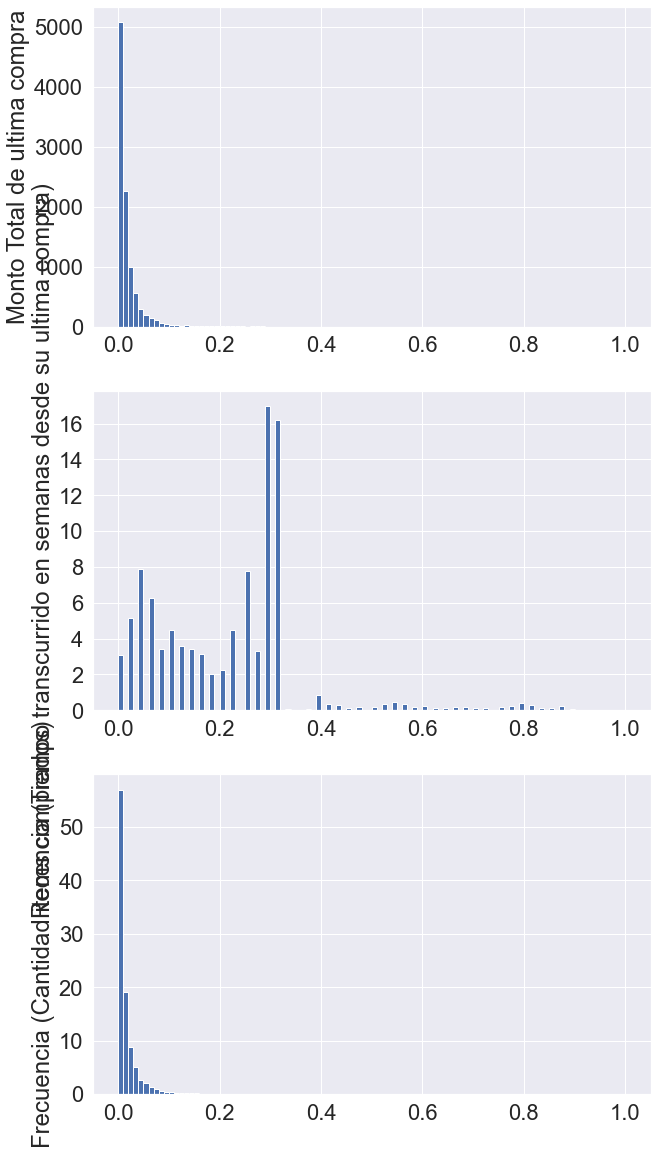

In [83]:
# Distribución de la Recency, Frequency and Monetary

f_dims = (10, 20)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=f_dims)
sns.set(font_scale = 1)

ax1.hist(df_sc['Monto Total de ultima compra'], bins=100)
ax1.set_ylabel('Monto Total de ultima compra')
               
ax2.hist(df_sc['Recencia (Tiempo transcurrido en semanas desde su ultima compra)'], density=True, bins=100)
ax2.set_ylabel('Recencia (Tiempo transcurrido en semanas desde su ultima compra)')

ax3.hist(df_sc['Frecuencia (Cantidad items comprados)'], density=True, bins=100)
ax3.set_ylabel('Frecuencia (Cantidad items comprados)')

plt.show()

El cálculo del puntaje RFM es basado en los valores de Recency, Frecuency, Money normalizados. Basados en esto dividimos nuestros clientes. La formula usada para calificar este puntaje es de: 0.15 x puntaje Recency + 0.28 x puntaje Frecuency + 0.57 x puntaje Monetary.

A continuación calcularemos el puntaje RFM.

In [84]:
rfm_df = df_sc[["Cedula", "Recencia (Tiempo transcurrido en semanas desde su ultima compra)", "Frecuencia (Cantidad items comprados)", "Monto Total de ultima compra"]]
rfm_df.head()

,Cedula,Recencia (Tiempo transcurrido en semanas desde su ultima compra),Frecuencia (Cantidad items comprados),Monto Total de ultima compra
0,0.000000,0.250000,0.016667,0.023143
1,0.000100,0.250000,0.000000,0.005742
2,0.000201,0.187500,0.040000,0.029669
3,0.000301,0.041667,0.053333,0.072040
4,0.000401,0.062500,0.013333,0.011631


In [85]:
rfm_df['R_rank'] = rfm_df['Recencia (Tiempo transcurrido en semanas desde su ultima compra)'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frecuencia (Cantidad items comprados)'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monto Total de ultima compra'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,Cedula,Recencia (Tiempo transcurrido en semanas desde su ultima compra),Frecuencia (Cantidad items comprados),Monto Total de ultima compra,R_rank_norm,F_rank_norm,M_rank_norm
0,0.000000,0.250000,0.016667,0.023143,47.637956,73.862269,73.862269
1,0.000100,0.250000,0.000000,0.005742,47.637956,13.527466,13.527466
2,0.000201,0.187500,0.040000,0.029669,59.458359,90.296712,90.296712
3,0.000301,0.041667,0.053333,0.072040,89.207901,93.564555,93.564555
4,0.000401,0.062500,0.013333,0.011631,82.014865,68.589615,68.589615


In [86]:
rfm_df['Puntaje_RFM'] = (0.15*rfm_df['R_rank_norm']) + (0.28 *rfm_df['F_rank_norm']) + (0.57*rfm_df['M_rank_norm'])
rfm_df['Puntaje_RFM'] *= 0.05
rfm_df = rfm_df.round(2) 
rfm_df[['Cedula', 'Puntaje_RFM']]

,Cedula,Puntaje_RFM
0,0.0,3.50
1,0.0,0.93
2,0.0,4.28
3,0.0,4.65
4,0.0,3.53
...,...,...
9971,1.0,3.12
9972,1.0,3.43
9973,1.0,2.78
9974,1.0,1.15


In [87]:
rfm_df["Segmentación"] = np.where(rfm_df['Puntaje_RFM'] >4.5, "Cliente TOP", (np.where(rfm_df['Puntaje_RFM'] > 4, "Cliente de alto valor", (np.where(rfm_df['Puntaje_RFM'] > 3, "Cliente de mediano valor", np.where(rfm_df['Puntaje_RFM'] > 1.6, 'Cliente de bajo valor', 'Cliente perdido'))))))
rfm_df[['Cedula', 'Puntaje_RFM', 'Segmentación']]

,Cedula,Puntaje_RFM,Segmentación
0,0.0,3.50,Cliente de mediano valor
1,0.0,0.93,Cliente perdido
2,0.0,4.28,Cliente de alto valor
3,0.0,4.65,Cliente TOP
4,0.0,3.53,Cliente de mediano valor
...,...,...,...
9971,1.0,3.12,Cliente de mediano valor
9972,1.0,3.43,Cliente de mediano valor
9973,1.0,2.78,Cliente de bajo valor
9974,1.0,1.15,Cliente perdido


Ahora vemos por medio de un gráfico de torta el porcentaje de clientes de acuerdo a la segmentación RFM para nuestra base de datos.

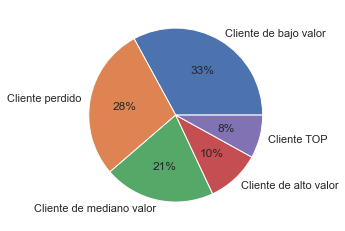

In [88]:
plt.pie(rfm_df['Segmentación'].value_counts(), labels=rfm_df['Segmentación'].value_counts().index, autopct='%.0f%%')
plt.show()

## Explorando los modelos más utilizados en el sector financiero

En finanzas hay un rápido crecimiento del uso del Machine Learning, a continuación, se muestran cuáles son los usos mas importantes que se esta dando en los diferentes sectores financieros y porque esta nueva tecnología a ayudad a este importante sector.
-	Evaluación de solvencia crediticia: La inteligencia artificial ayuda a los bancos a emitir crédito con más confianza a quienes pasan los controles del sistema. Para esto, los programas y algoritmos analizan toda la información disponible sobre un prestatario potencial, estudian su historial crediticio, los cambios en su nivel de salarios y, en base a esto, determinan la confiabilidad del cliente y la seguridad del préstamo.

-	Toma de decisiones: Esta es una tarea global que se resuelve con éxito a través de la introducción de Inteligencia Artificial y Machine Learning en Servicios Financieros. Cuando un algoritmo puede analizar todos los datos estructurados y no estructurados disponibles (tanto internos de los procesos comerciales de la empresa como externos, como las solicitudes de los clientes y sus acciones en las redes sociales) una institución financiera puede descubrir tendencias útiles y potencialmente peligrosas. Ayuda a evaluar los niveles de riesgo y permite que las personas tomen las decisiones más informadas.

-	Protección contra el fraude: Los bancos y los sistemas de pago ya han estado desarrollando modelos para identificar y bloquear la mayoría de las transacciones fraudulentas. Estos modelos se basan en el historial de transacciones del cliente, así como en el comportamiento del cliente en Internet. A partir de tecnologías Big Data se han desarrollado sistemas basados en Inteligencia Artificial que detectan fraudes online. 

-	Mejora del nivel de servicio: Muchos bancos han implementado aplicaciones basadas en Inteligencia Artificial que permiten a los clientes obtener respuestas a preguntas actuales. Por ejemplo, un cliente puede conocer sus gastos de este mes, la cantidad gastada en comida, la deuda de la tarjeta de crédito, el seguro más económico, etc. Hay aplicaciones que, cuando se conectan a un sistema de pago, analizan las cuentas. Por ejemplo, para la comunicación móvil o Internet. Estos ofrecen al propietario más potencial para ahorrar y ganar dinero. Los algoritmos sofisticados analizan el comportamiento de los usuarios en línea y permiten a las instituciones financieras desarrollar ofertas más personalizadas y mutuamente beneficiosas.

-	Retención y adquisición de clientes basada en análisis de datos: Con base en el análisis del comportamiento financiero individual de un cliente, los bancos están desarrollando publicidad o propuestas adecuadas. De esta forma, los bancos también reciben información sobre las intenciones de un cliente o de un cliente potencial. Tienen la oportunidad de atraer a un nuevo cliente que actualmente necesita una oferta personalizada y también pueden tomar medidas para suspender los servicios si el cliente planea negarse a cooperar con este banco.

-	Desarrollo de estrategias de inversión: Cada vez que procesa un nuevo flujo de información, la Inteligencia Artificial aprende y sistematiza su conocimiento. Esto le permite evaluar la situación en el mercado y formar las transacciones de inversión más rentables a través del análisis de Big Data. La principal ventaja de usar Inteligencia Artificial en el desarrollo de estrategias de inversión es el hecho de que no sabe nada sobre los sentimientos y emociones humanas típicas. Por lo tanto, todos sus supuestos son absolutamente racionales.

La inteligencia artificial es definitivamente un área prometedora para la inversión. Las empresas que trabajan en finanzas seguirán siendo competitivas en las próximas décadas si hoy prestan atención a estas innovaciones. Al introducir algoritmos de aprendizaje automático e inteligencia artificial en la industria financiera, los líderes también deben considerar un sistema de protección contra ataques cibernéticos y formas de brindar a los usuarios confianza en la seguridad de sus datos.

Fuente: https://www.datasciencecentral.com/machine-learning-in-finance-benefits-use-cases-and-opportunities/


## Modelo de fuga de clientes (Churn)

La fuga de clientes o Churn, es la tasa a la que los clientes dejan de comprar sus productos o servicios medidos a lo largo de un período de tiempo específico. Es un KPI crítico que todas las empresas deben seguir. Veamos un ejemplo:

Digamos que gasta 100 en marketing para convertir a un prospecto en un comprador, quien luego compra $50 en bienes o servicios pero nunca regresa. Eso es desgaste de clientes, y es costoso.

Una fuerte retención de clientes requiere no solo saber cuántos compradores se están yendo, sino también por qué, cuánto cuesta reemplazarlos y calcular las probabilidades de que pueda recuperarlos con un alcance específico. Sin esta información, es difícil saber si sus ofertas satisfacen las necesidades de los clientes.

Supervisar la deserción de clientes es una buena práctica para cualquier negocio. Puede ayudar a las organizaciones a comprender una forma particularmente relevante de ROI o retorno de la inversión -  el retorno de la inversión en adquisición de clientes (ROCAI).

Podría significar, en el ejemplo anterior, que sus productos solo tienen un valor temporal. En el caso de un modelo comercial de suscripción o ingresos recurrentes, que las ofertas competitivas tengan un mayor atractivo, o que su servicio al cliente sea inferior a la media del resto, por ejemplo.

Statista descubrió que, en 2018, las compañías de cable de EE. UU. experimentaron la tasa más alta de abandono, con un 28 %, seguidas de cerca por el comercio minorista con un 27 % y las empresas financieras con un 25 %. Las empresas de viajes obtuvieron los mejores resultados, con un 18 %. Si tomamos el 20% como promedio, las empresas están perdiendo uno de cada cinco clientes por los que trabajaron tan duro para adquirir.


### Cálculo de la tasa de abandono de clientes (Churn Rate)

Todas las empresas tienen abandono de clientes, algunas industrias lo han experimentado más que otras. Una empresa de servicios básicos, como un proveedor de telefonía celular, medirá la rotación de manera diferente a un minorista de alto nivel. Tener una idea de cuántos clientes se van es el primer paso; entonces puedes empezar a descifrar el por qué.

También es posible que no valore a todos los clientes por igual en su cálculo. Un cliente que se va en los primeros 90 días de una suscripción, o después de una compra, no debería tener el mismo peso que perder un cliente que ha estado en tu empresa durante años o representa un alto valor de por vida del cliente y, por lo tanto, contribuye a la rentabilidad.

Una vez que establezca el momento y la métrica de desgaste para su empresa, la fórmula para la tasa de abandono de clientes es bastante simple: Divide el número de clientes que se fueron durante un período determinado por el número total de clientes durante ese período.

$Churn$= # de clientes perdidos en un periodo / (clientes al inicio del período + clientes ganados en el período)

Fuente: https://www.netsuite.com/portal/resource/articles/erp/customer-attrition.shtml

## Capítulo 4

Utilizaremos el algoritmo K-Means para hacer una clasificación de los clientes basados en su edad y en la suma de los montos de los años 2019 y 2020, puesto que este es el valor que consideramos que contiene toda la información de las compras de los clientes y también recordemos que con la edad ya hicimos un proceso de imputación de datos, en donde a los valores que superaban los 100 años los reemplazamos con la mediana del análisis que resulto de analizar la variable edad sin esos valores atípicos. Para utilizar el algoritmo extraeremos del dataframe df_ml la información que necesitamos, puesto que allí encontramos la información sin modificar ni escalar.

In [89]:
X=df_ml[['Suma montos 2019 y 2020', 'Edad']]
# Escalado de datos
# ==============================================================================
X_scaled = scale(X)
X_scaled

array([[-0.00805595, -0.19060023],
       [-0.17350259,  2.19164391],
       [-0.15421022,  2.29090408],
       ...,
       [-0.02723139, -2.0765435 ],
       [-0.21243808, -2.0765435 ],
       [-0.52407796, -1.38172229]])

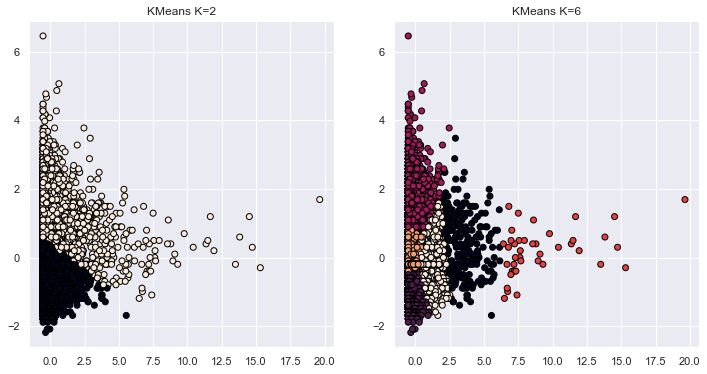

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Resultados para K = 2
# ==============================================================================
y_predict = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
# ==============================================================================
y_predict = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

K-Means es uno de los algoritmos de clasificación más simples y comúnmente usados, este requeriré que ingresemos el número K de clusters que requerimos, esta es tal vez su mayor debilidad, pues muchas veces de antemano no sabemos cuál será el valor mas apropiado; por esta razón existen métodos que nos permiten encontrar el número K más apropiado para nuestros datos. A continuación utilizaremos el método Elbow y el método Silhouette para hallar el numero K adecuado para nuestros datos.

### Método Elbow

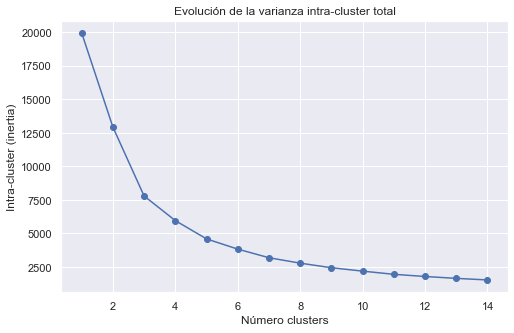

In [95]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 25, 
                        random_state = 123
                    )
    modelo_kmeans.fit(X_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

Este método del codo nos indica de manera visual el número de clusters mas adecuado en el lugar que podríamos llamar el codo de la gráfica, en este caso no parecer haber un número que sea evidentemente el más adecuado, por esta razón haremos una gráfica con 4 y 5 clusters.

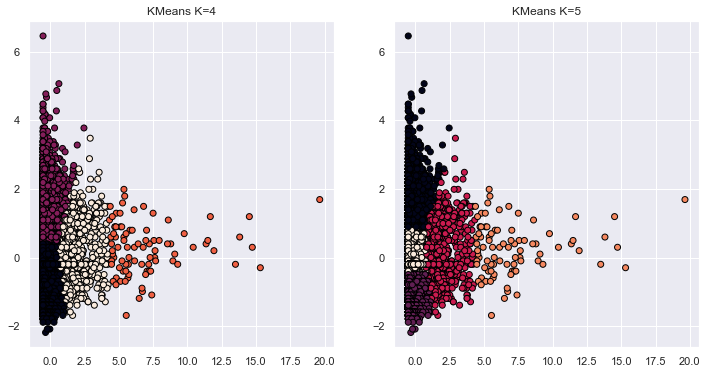

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Resultados para K = 4
# ==============================================================================
y_predict = KMeans(n_clusters=4, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=4');

# Resultados para K = 5
# ==============================================================================
y_predict = KMeans(n_clusters=5, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=5');

### Método Silhouette

Este método nos muestra gráficamente por medio de siluetas como quedan distribuidos los datos para el numero de clusters que se esté evaluando, de acuerdo al grosor de la silueta sabremos que tantos datos tendrá cada cluster, adicionalmente para cada número de cluster tenemos un score, el cual varía entre -1 y 1, donde un valor alto indica que el objeto está bien emparejado con su propio cúmulo y mal emparejado con los cúmulos vecinos. Si la mayoría de los objetos tienen un valor alto, entonces la configuración del cúmulo es apropiada. Si muchos puntos tienen un valor bajo o negativo, entonces la configuración de cúmulos puede tener demasiados o muy pocos cúmulos.

In [98]:
def silhouette_analysis(X):
    range_n_clusters = [2, 3, 4, 5, 6,8]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(19, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for %s clustering on sample data "
                      "with n_clusters = %d, score = %.3f" % (clusterer.__class__.__name__, n_clusters,silhouette_avg)),
                     fontsize=14, fontweight='bold')

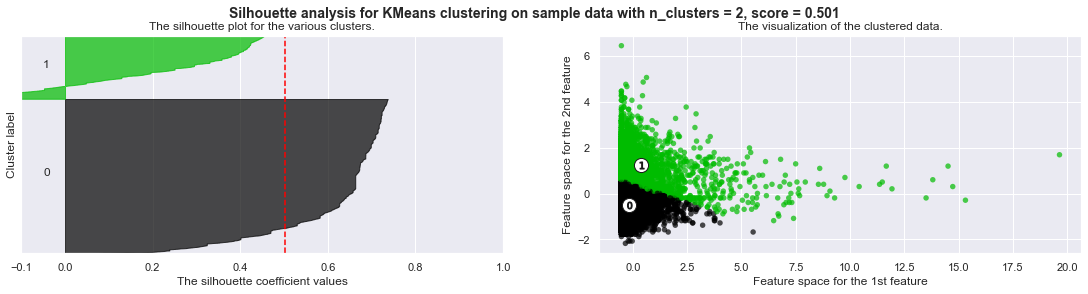

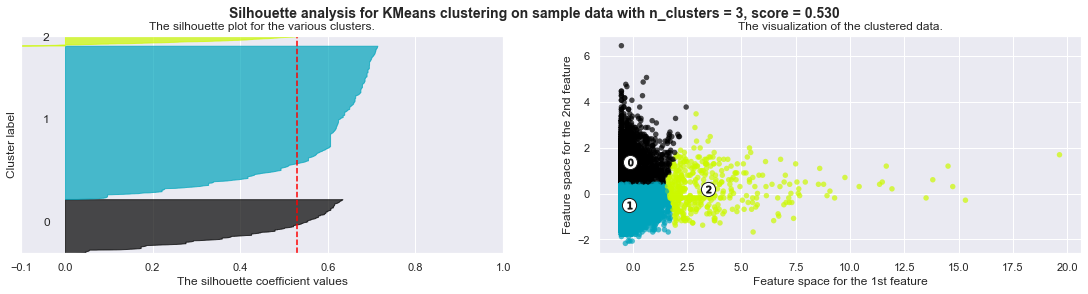

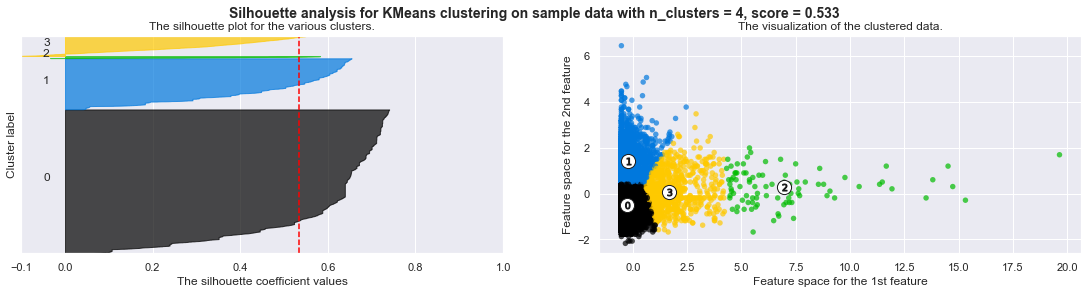

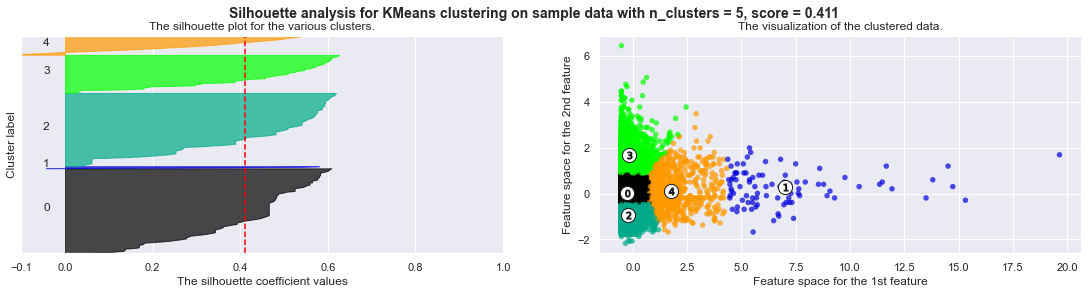

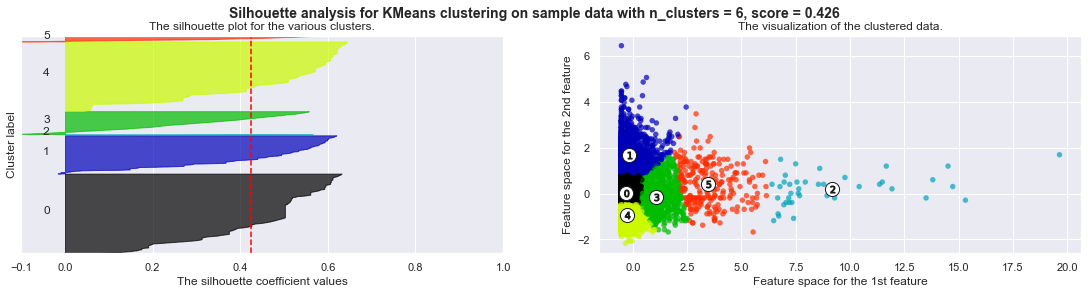

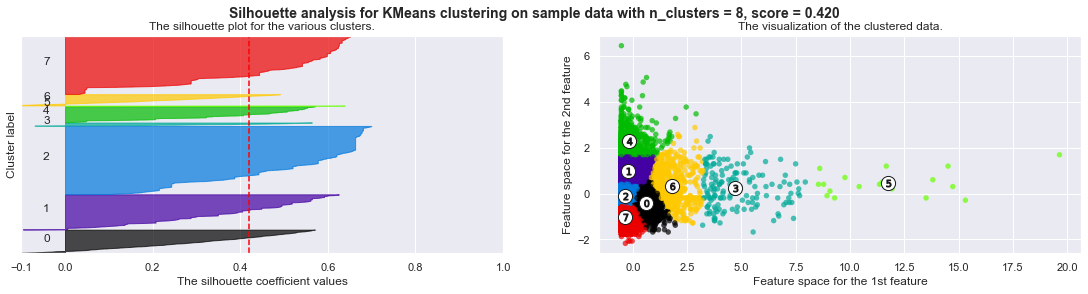

In [99]:
silhouette_analysis(X_scaled)

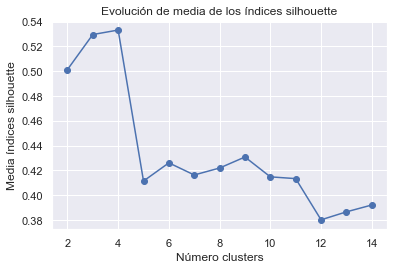

In [100]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 25, 
                        random_state = 10
                    )
    cluster_labels = modelo_kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

De acuerdo al método, el número de clusters mas apropiado es 4, con un score de 0.533 (el más alto de todos), algo que también nos había mostrado el método Elbow pero allí no era muy claro esto.

## Agglomerative Clustering

La técnica de agrupamiento asume que cada punto de datos es lo suficientemente similar a los otros puntos de datos que se puede suponer que los datos al inicio están agrupados en 1 grupo.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc


In [103]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


In [104]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']


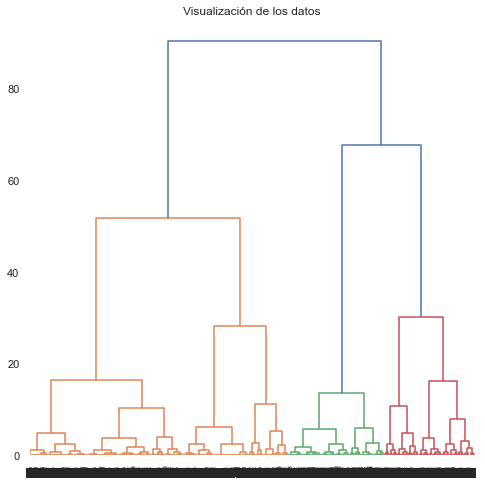

In [106]:
plt.figure(figsize =(8, 8))
plt.title('Visualización de los datos')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))


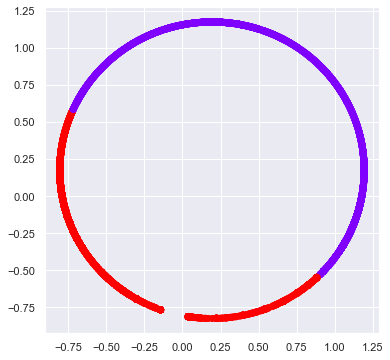

In [107]:
ac2 = AgglomerativeClustering(n_clusters = 2)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
		c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()


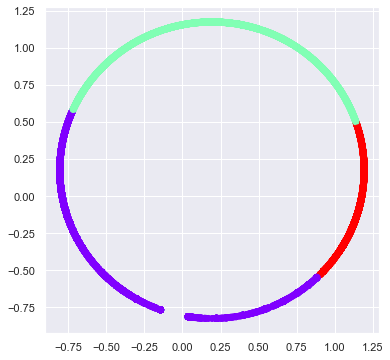

In [108]:
ac3 = AgglomerativeClustering(n_clusters = 3)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
		c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()


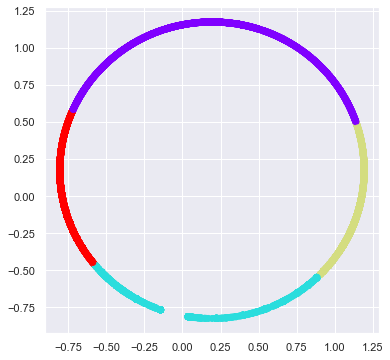

In [109]:
ac4 = AgglomerativeClustering(n_clusters = 4)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
			c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()


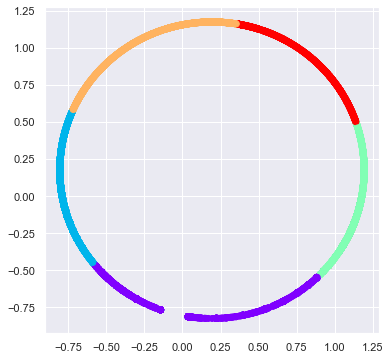

In [110]:
ac5 = AgglomerativeClustering(n_clusters = 5)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
			c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()


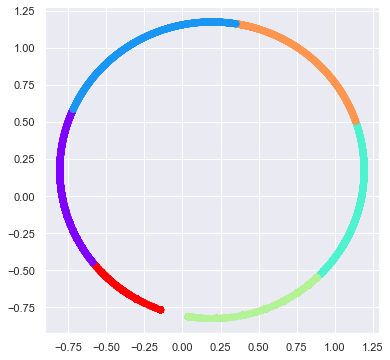

In [111]:
ac6 = AgglomerativeClustering(n_clusters = 6)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
			c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()


Ahora determinamos el número optimo de cluster usando Silhouette Scores

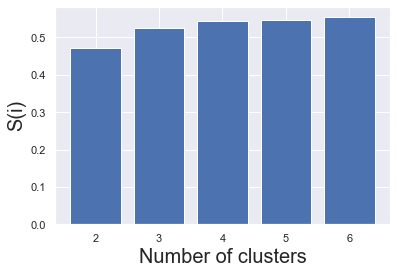

In [112]:
k = [2, 3, 4, 5, 6]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
		silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
		silhouette_score(X_principal, ac6.fit_predict(X_principal)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()


Podemos observar con este método que usando Silhouette Scores los resultados para 4,5 y 6 clusters son muy cercanos, difícilmente diferenciables, por lo tanto, para realizar un modelo de clasificación se recomienda utilizar 4 clusters, puesto que adicionar más clusters al modelo lo haría más complejo y la mejoría en la clasificación no es notoria. 

### Machine Learning en la industria de seguros

Un área específica de tecnología avanzada que se utiliza ampliamente en la cadena de valor de los seguros es el Machine Learning, que está ayudando a las compañías de seguros a ahorrar tiempo y dinero al mejorar la eficiencia operativa en áreas como la detección de fraudes, la gestión de reclamaciones, la cotización, la facturación y el servicio al cliente. 

De acuerdo a Accenture las áreas principales para la aplicación de ML incluyen asesoramiento sobre seguros, prevención de fraudes, procesamiento de reclamaciones y gestión de riesgos.

-	Asesoramiento e información sobre seguros: La capacidad de ayudar a los consumidores en cada etapa del proceso de compra es útil para lograr el objetivo deseado de adquisición y retención de clientes a través de la orientación. Una gran parte de esto es el uso de chatbots en las aplicaciones de mensajería, ya que los algoritmos de ML analizan los datos para ayudar a resolver cosas como consultas de procesamiento de reclamos y responder preguntas básicas.

-	Prevención del fraude: El fraude de propiedad y accidentes roba aproximadamente 30 mil millones cada año de la industria de seguros y ocurre en casi el 10% de todas las pérdidas de propiedad y accidentes. ML identifica y señala posibles situaciones de reclamos al principio del proceso de reclamos, lo que permite a las aseguradoras investigar rápidamente y clasificar correctamente si un reclamo es legítimo o fraudulento.

-	Procesamiento de reclamos: Desde la presentación inicial del reclamo hasta la revisión de coberturas y la programación de ajustadores en el sitio, el proceso de reclamos es una tarea que requiere mucho trabajo y tiempo.  Al aprovechar la tecnología ML, los ajustadores pueden reducir el tiempo y los costos de procesamiento. ML también puede ser una herramienta efectiva para que los asegurados verifiquen el estado de su reclamo sin tener que contactar a su corredor o ajustador.

-	Gestión de riesgos: ML se ha convertido en una herramienta vital en la predicción de pérdidas y para establecer con precisión las primas de las pólizas. Al tomar datos y diseñar algoritmos que puedan detectar instantáneamente posibles actividades anormales o inesperadas, ML puede ayudar a mitigar significativamente los riesgos. Un ejemplo serían los dispositivos de seguros basados en el uso, más comúnmente conocidos como telemática, que basan las tarifas de seguros de automóviles en habilidades o comportamientos de conducción específicos.

Fuente: https://www.propertycasualty360.com/2021/11/04/machine-learning-practical-applications-for-the-insurance-industry/?slreturn=20220125175517

### Industrialización de modelos

El Machine Learning es una técnica usada para entrenar modelos predictivos basados en algoritmos matemáticos. El aprendizaje automático analiza las relaciones entre los campos de datos para predecir valores desconocidos.

La creación e implementación de un modelo de Machine Learning es un proceso iterativo:

-	Los científicos de datos exploran los datos de origen para determinar las relaciones entre las características y las etiquetas previstas.

-	Los científicos de datos entrenan y validan modelos basados en algoritmos adecuados para encontrar el modelo óptimo para la predicción.

-	El modelo óptimo se implementa en producción, como un servicio web u otra función encapsulada.

-	A medida que se recopilan datos nuevos, se vuelve a entrenar el modelo periódicamente para mejorar su eficacia.

El Machine Learning a escala trata dos ámbitos de escalabilidad diferentes. La primera es el entrenamiento de un modelo con grandes conjuntos de datos, que necesita las funcionalidades de la escalabilidad horizontal de un clúster para realizar el entrenamiento. El segundo se centra en la puesta en operación del modelo entrenado de manera que se pueda escalar para cumplir las necesidades de las aplicaciones que lo consumen. Normalmente esto se consigue mediante la implementación de las funcionalidades de predicción como un servicio web que, a continuación, se puede escalar horizontalmente.

El Machine Learning a escala tiene la ventaja de que se pueden generar funcionalidades eficaces de predicción, ya que normalmente los mejores modelos parten de datos más extensos. Una vez que se entrena un modelo, se puede implementar como un servicio web sin estado, de alto rendimiento y con escalabilidad horizontal.

**Preparación y entrenamiento del modelo**

Durante la fase de preparación y entrenamiento del modelo, los científicos de datos exploran los datos de forma interactiva mediante lenguajes como Python y R para:

-	Extraer muestras de almacenes de datos de gran volumen.

-	Buscar y tratar los valores atípicos, los duplicados y los valores que faltan para limpiar los datos.

-	Determinar las correlaciones y las relaciones en los datos mediante la visualización y el análisis estadístico.

-	Generar nuevas características calculadas que mejoren la capacidad de predicción de las relaciones estadísticas.

-	Entrenar modelos de Machine Learning basados en algoritmos de predicción.

-	Validar modelos entrenados utilizando los datos que se han retenido durante el entrenamiento.

Para posibilitar esta fase de modelado y análisis interactivo, la plataforma de datos debe permitir a los científicos de datos explorar los datos utilizando una variedad de herramientas. Además, el entrenamiento de un modelo de entrenamiento automático complejo puede requerir una gran cantidad de procesamiento intensivo de grandes volúmenes de datos, por lo que serán esenciales los recursos suficientes para escalar horizontalmente el entrenamiento del modelo.

**Implementación y consumo del modelo**

Cuando un modelo está listo para su implementación, se puede encapsular como un servicio web e implementarlo en la nube, en un dispositivo perimetral o dentro de un entorno de ejecución de Machine Learning empresarial. Este proceso de implementación se conoce como puesta en operación.

**Desafíos**

El aprendizaje a escala automático produce algunos desafíos:

-	Normalmente necesitará una gran cantidad de datos para entrenar un modelo, especialmente en modelos de Deep Learning.

-	Debe preparar estos conjuntos de macrodatos antes de comenzar incluso a entrenar el modelo.

-	La fase de entrenamiento del modelo debe tener acceso a los almacenes de macrodatos. Es habitual realizar el entrenamiento del modelo utilizando el mismo clúster de macrodatos, por ejemplo Spark, que se usa para la preparación de los datos.

-	Para escenarios como el Deep Learning, no solo necesitará un clúster que pueda proporcionar el escalado horizontal en las CPU, sino que el clúster deberá disponer de nodos de GPU habilitados.

Fuente: https://docs.microsoft.com/es-es/azure/architecture/data-guide/big-data/machine-learning-at-scale